# Project contributors

Philip Tarstrup s214418

Radu Grecu      s246415

Vilim Branica   s243169

Mathias Dyhr    s204156

# Introduction

Welcome to the exploration of EV charging station usage patterns in Palo Alto, California. This analysis seeks to provide actionable insights for optimizing electric vehicle (EV) charging infrastructure, improving operational efficiency, and planning strategic developments. By leveraging data analytics, clustering, and predictive modeling techniques, we aim to understand user behaviors, forecast energy demands, and identify opportunities for enhancing service delivery. This project is not only a technical exercise but also a step toward fostering sustainable transportation solutions.

# Data Analysis and Visualization

## Importing Necessary Packages and Reading Original Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("EVChargingStationUsage.csv")

C:\Users\phill\AppData\Local\Temp\ipykernel_18884\2665056436.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("EVChargingStationUsage.csv")


## Overview and Data Cleaning

To provide a quick overview of the data, the first and last five rows and all columns of the original dataframe are displayed:

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns
df

Station Name          MAC Address  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   
...                                ...                  ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A   

                  Org Name        Start Date Start Time Zone  \
0        City of Palo Alto   7/29/2011 20:17             PDT   
1        City of Palo Alto    7/30/2011 0:00             PDT   
2        City of Palo Alto    7/30/2011 8:16             PDT   
3        City of Palo Alto   7/30/2011 14:51             PDT   
4        City of Palo Alto   7/30/2011 18:51             PDT   
...                    ...               ...             ...   
259410  City of Palo Alto   12/31/2020 16:39             PST   
259411  City of Palo Alto   12/31/2020 16:48             PST   
259412  City of Palo Alto   12/31/2020 17:28             PST   
259413  City of Palo Alto   12/31/2020 17:49             PST   
259414  City of Palo Alto   12/31/2020 18:19             PST   

                End Date End Time Zone Transaction Date (Pacific Time)  \
0        7/29/2011 23:20           PDT                 7/29/2011 23:20   
1         7/30/2011 0:02           PDT                  7/30/2011 0:02   
2        7/30/2011 12:34           PDT                 7/30/2011 12:34   
3        7/30/2011 16:55           PDT                 7/30/2011 16:55   
4        7/30/2011 20:03           PDT                 7/30/2011 20:03   
...                  ...           ...                             ...   
259410  12/31/2020 17:14           PST                12/31/2020 17:16   
259411  12/31/2020 20:31           PST                12/31/2020 20:32   
259412    1/1/2021 10:56           PST                  1/1/2021 10:57   
259413  12/31/2020 21:55           PST                12/31/2020 21:56   
259414  12/31/2020 19:01           PST                12/31/2020 19:02   

       Total Duration (hh:mm:ss) Charging Time (hh:mm:ss)  Energy (kWh)  \
0                        3:03:32                  1:54:03      6.249457   
1                        0:02:06                  0:01:54      0.106588   
2                        4:17:32                  4:17:28     14.951777   
3                        2:03:24                  2:02:58      7.159643   
4                        1:11:24                  0:43:54      1.957765   
...                          ...                      ...           ...   
259410                   0:35:44                  0:35:18      1.841000   
259411                   3:43:01                  2:14:04     12.744000   
259412                  17:28:14                  5:08:12     29.665000   
259413                   4:05:34                  3:53:42     11.976000   
259414                   0:42:07                  0:41:44      1.571000   

        GHG Savings (kg)  Gasoline Savings (gallons) Port Type  Port Number  \
0                  2.625                       0.784   Level 2            2   
1                  0.045                       0.013   Level 2            2   
2                  6.280                       1.876   Level 2            2   
3                  3.007                       0.899   Level 2            2   
4                  0.822                       0.246   Level 2            2   
...                  ...                         ...       ...          ...   
259410             0.773                       0.231   Level 2            2   
259411             5.352                       1.599   Level 2            2   

The original dataframe includes 259415 rows (observations) and 33 columns (variables). The first observation was on the 29th of july 2011 and the last observation was on the 31st of december 2020. Checking basic information regarding the variables in the original dataframe:

In [4]:
df.info() # Shows Column number, name, non-null count and dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

9 of the variables are floats, 3 are integers and 21 are objects. It can be seen that not all variables have 259415 non-null values, so we check the number number of unique values and missing values for each column:

In [5]:
print(pd.DataFrame({"Unique Values": df.nunique(),"Missing Values": df.isnull().sum()}))

                                 Unique Values  Missing Values
Station Name                                47               0
MAC Address                                 83               0
Org Name                                     2               0
Start Date                              244798               0
Start Time Zone                              3               0
End Date                                244159               0
End Time Zone                                3               0
Transaction Date (Pacific Time)         240905             209
Total Duration (hh:mm:ss)                31025               0
Charging Time (hh:mm:ss)                 22473               0
Energy (kWh)                            118061               0
GHG Savings (kg)                         15535               0
Gasoline Savings (gallons)                6333               0
Port Type                                    2               9
Port Number                                  2         

In order to visualize what values are missing here is a plot where it can seen which variables are missing for which rows:

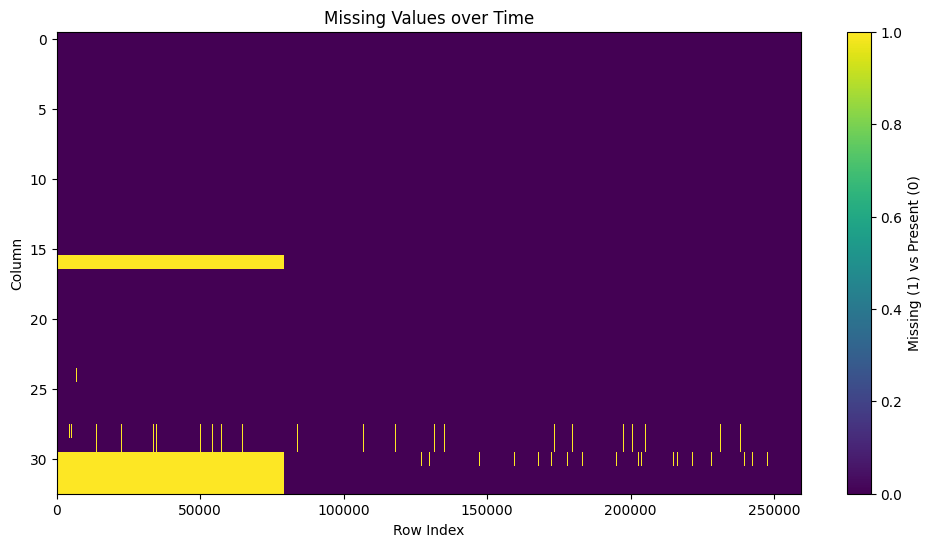

In [6]:
# Plot missing values over time
plt.figure(figsize=(12, 6))
plt.imshow(df.isnull().T, aspect='auto', cmap='viridis', interpolation='none')
plt.colorbar(label="Missing (1) vs Present (0)")
plt.xlabel("Row Index")
plt.ylabel("Column")
plt.title("Missing Values over Time")
plt.show()

EVSE ID, County, System S/N and Model Number are all systematically missing up to and including row 78948. Other missing values are less frequent and seem to be random. Checking date of row 78948 to see when they started recording EVSE ID, County and System I/D.

In [7]:
record_start_date, record_start_time_zone = df.iloc[78948][['Start Date', 'Start Time Zone']]

print("EVSE ID, County and System S/N were recorded from the following date:",record_start_date,record_start_time_zone)

EVSE ID, County and System S/N were recorded from the following date: 8/1/2016 5:21 PDT


The systematically missing values are likely not from any variables that will become particularly important later in the project, so dropping the rows with missing values seems excessive as it would remove roughly all data from the first 5 years of the dataframe. Rows that should be dropped however are duplicates, if there are any:

In [8]:
print("There are",df.duplicated().sum(),"duplicated rows")

There are 4 duplicated rows


These duplicated rows will be dropped. When looking at the table with unique values and missing values we see that City, State/Province and Country only have one unique value, meaning we can drop these columns from the dataframe. Next we check columns that only have a few unique values:

In [9]:
print("Org Name:",df['Org Name'].unique())
print("Start Time Zone:",df['Start Time Zone'].unique())
print("End Time Zone:",df['End Time Zone'].unique())
print("Port Type:",df['Port Type'].unique())
print("Port Number:",df['Port Number'].unique())
print("Plug Type:",df['Plug Type'].unique())
print("Postal Code:",df['Postal Code'].unique())
print("Currency:",df['Currency'].unique())
print("County:",df['County'].unique())

Org Name: ['City of Palo Alto' 'City of Palo Alto ']
Start Time Zone: ['PDT' 'PST' 'UTC']
End Time Zone: ['PDT' 'PST' 'UTC']
Port Type: ['Level 2' 'Level 1' nan]
Port Number: [2 1]
Plug Type: ['J1772' 'NEMA 5-20R']
Postal Code: [94301 94303 94306]
Currency: ['USD' nan 'EUR' 'MXN' 'CAD']
County: [nan 'Santa Clara County' 'San Mateo County']


Org Name has two unique values which are actually the same so this column can also be dropped. We see that there are different currencies. These should be dealt with so the fee variable is accurate:

In [10]:
print(f"Number of rows with Currency 'MXN', 'EUR', or 'CAD': {df['Currency'].isin(['MXN', 'EUR', 'CAD']).sum()}")

Number of rows with Currency 'MXN', 'EUR', or 'CAD': 14


There are so few rows with currencies other than USD that we might as well drop them instead of converting them to USD. Since there are only 1788 rows missing currency, these will also be dropped. After these actions all fees wil be in USD, which means we can also drop the currency column. Next we will check if there are any rows where charging time exceeds total duration:

In [11]:
# Create 'Charging Time' and 'Total Duration' variables with seconds as the unit
charging_time_seconds = pd.to_timedelta(df['Charging Time (hh:mm:ss)'], errors='coerce').dt.total_seconds()
total_duration_seconds = pd.to_timedelta(df['Total Duration (hh:mm:ss)'], errors='coerce').dt.total_seconds()

# Number of rows where Charging Time > Total Duration
invalid_rows_count = (charging_time_seconds > total_duration_seconds).sum()

# Output the result
print(f"Number of rows where Charging Time > Total Duration: {invalid_rows_count}")

Number of rows where Charging Time > Total Duration: 45


Obviously it should not be possible for charging time to exceed total duration, so these rows will be dropped. Dropping afforementioned rows and columns and defining new cleaner dataframe:

In [13]:
df0 = (
    df.drop_duplicates()  # Remove duplicate rows
    .dropna(subset=['Currency'])  # Drop rows with NaN in 'Currency'
    .loc[~df['Currency'].isin(['MXN', 'EUR', 'CAD'])]  # Exclude specific currencies
    .loc[charging_time_seconds <= total_duration_seconds]  # Only include rows where charging time <= total duration
    .drop(columns=['City', 'State/Province', 'Country', 'Org Name','Currency'])  # Drop unnecessary columns
    .rename(columns={'Fee': 'Fee (USD)'})  # Rename 'Fee' to 'Fee (USD)' now that all fees are of the same currency
)
df0 # Quick overview of new cleaner dataframe

Station Name          MAC Address        Start Date  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/29/2011 20:17   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76    7/30/2011 0:00   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76    7/30/2011 8:16   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/30/2011 14:51   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   7/30/2011 18:51   
...                                ...                  ...               ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81  12/31/2020 16:39   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  12/31/2020 16:48   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37  12/31/2020 17:28   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  12/31/2020 17:49   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  12/31/2020 18:19   

       Start Time Zone          End Date End Time Zone  \
0                  PDT   7/29/2011 23:20           PDT   
1                  PDT    7/30/2011 0:02           PDT   
2                  PDT   7/30/2011 12:34           PDT   
3                  PDT   7/30/2011 16:55           PDT   
4                  PDT   7/30/2011 20:03           PDT   
...                ...               ...           ...   
259410             PST  12/31/2020 17:14           PST   
259411             PST  12/31/2020 20:31           PST   
259412             PST    1/1/2021 10:56           PST   
259413             PST  12/31/2020 21:55           PST   
259414             PST  12/31/2020 19:01           PST   

       Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0                      7/29/2011 23:20                   3:03:32   
1                       7/30/2011 0:02                   0:02:06   
2                      7/30/2011 12:34                   4:17:32   
3                      7/30/2011 16:55                   2:03:24   
4                      7/30/2011 20:03                   1:11:24   
...                                ...                       ...   
259410                12/31/2020 17:16                   0:35:44   
259411                12/31/2020 20:32                   3:43:01   
259412                  1/1/2021 10:57                  17:28:14   
259413                12/31/2020 21:56                   4:05:34   
259414                12/31/2020 19:02                   0:42:07   

       Charging Time (hh:mm:ss)  Energy (kWh)  GHG Savings (kg)  \
0                       1:54:03      6.249457             2.625   
1                       0:01:54      0.106588             0.045   
2                       4:17:28     14.951777             6.280   
3                       2:02:58      7.159643             3.007   
4                       0:43:54      1.957765             0.822   
...                         ...           ...               ...   
259410                  0:35:18      1.841000             0.773   
259411                  2:14:04     12.744000             5.352   
259412                  5:08:12     29.665000            12.459   
259413                  3:53:42     11.976000             5.030   
259414                  0:41:44      1.571000             0.660   

        Gasoline Savings (gallons) Port Type  Port Number Plug Type  \
0                            0.784   Level 2            2     J1772   
1                            0.013   Level 2            2     J1772   
2                            1.876   Level 2            2     J1772   
3                            0.899   Level 2            2     J1772   
4                            0.246   Level 2            2     J1772   
...                            ...       ...          ...       ...   
259410                       0.231   Level 2            2     J1772   
259411                       1.599   Level 2            2     J1772   
259412                       3.723   Level 2            1     J1772   
259413                  

The dataframe now consists of 257566 rows and 28 columns.

## Descriptive Analysis and Visualization of the Data

When glancing over the dataframe it immediately becomes obvious that the fee was 0 for some time. It would be interesting to see when stations started charging a fee.

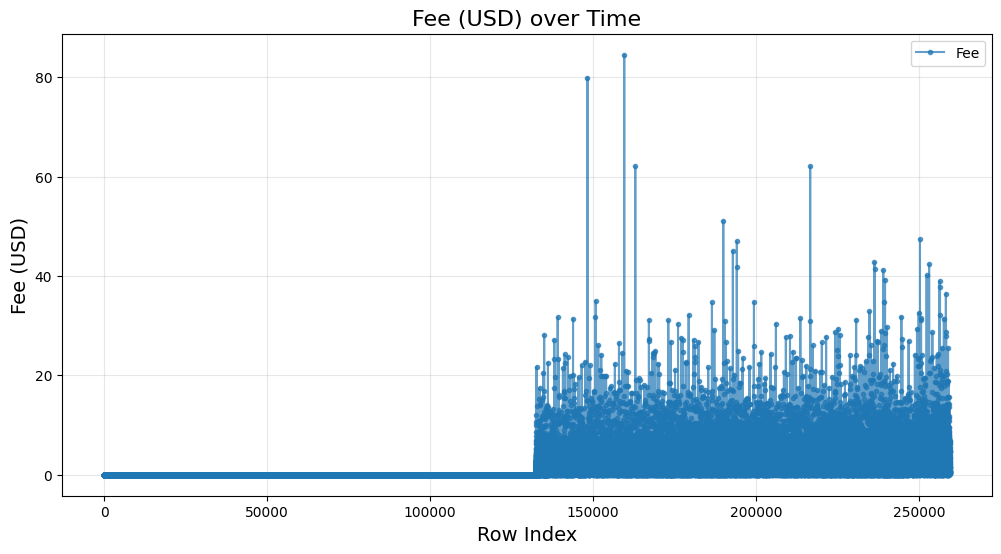

In [14]:
# Plot of Fee over Time
plt.figure(figsize=(12, 6))
plt.plot(df0.index, df0['Fee (USD)'], marker='o', linestyle='-', markersize=3, alpha=0.7, label='Fee')
plt.title("Fee (USD) over Time", fontsize=16)
plt.xlabel("Row Index", fontsize=14)
plt.ylabel("Fee (USD)", fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Aproximately half of all observations have zero fee. The date where stations started charging a fee:

In [15]:
# Filter rows where Fee > 0
fee_df0 = df0[df0['Fee (USD)'] > 0]

# Start Date and Start Time Zone of the first row with Fee > 0
fee_start_date, fee_start_time_zone = fee_df0.iloc[0][['Start Date', 'Start Time Zone']]

print("The first fee was charged on the following date:",fee_start_date,fee_start_time_zone)

The first fee was charged on the following date: 8/1/2017 5:16 PDT


So for the first six years or so there was no fee for charging. Next we create a correlation matrix to get an idea of correlations between every numeric variable. Total Duration and Charging Time are changed to seconds so they can be included in the correlation matrix:

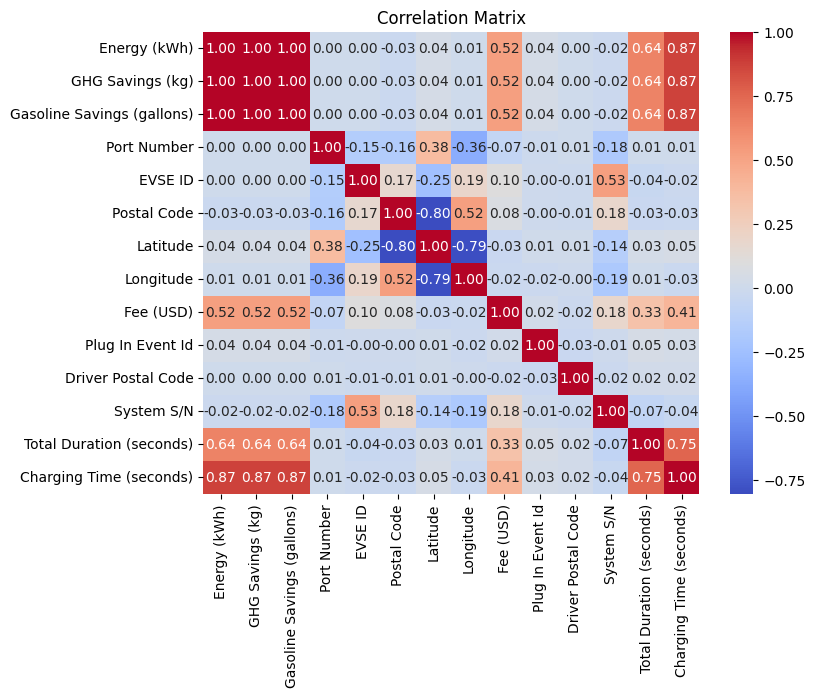

In [16]:
# Create a new DataFrame with only numeric columns (float64 and int64) from the original df
numeric_df0 = df0.select_dtypes(include=['float64', 'int64'])

# Convert 'Total Duration' and 'Charging Time' to seconds (or minutes)
numeric_df0['Total Duration (seconds)'] = total_duration_seconds
numeric_df0['Charging Time (seconds)'] = charging_time_seconds

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df0.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

Most of these correlations make sense. I suspect that if we check correlation between fee and energy, total duration and charging time in the dataframe which only includes non zero fees these values would be closer to one. As the correlations between energy, ghg savings and gasoline savings are all 1 comparing the other variables to only energy is sufficient.

In [17]:
# Compute the correlation between specific columns, but only for non-zero fees
cor_fee_energy = fee_df0['Fee (USD)'].corr(df0['Energy (kWh)'])
cor_fee_totalduration = fee_df0['Fee (USD)'].corr(numeric_df0['Total Duration (seconds)'])
cor_fee_chargingtime = fee_df0['Fee (USD)'].corr(numeric_df0['Charging Time (seconds)'])

# Display the result
print(f"The correlation between 'Fee (USD)' and 'Energy (kWh)' is: {cor_fee_energy}")
print(f"The correlation between 'Fee (USD)' and 'Total Duration (seconds)' is: {cor_fee_totalduration}")
print(f"The correlation between 'Fee (USD)' and 'Charging Time (seconds)' is: {cor_fee_chargingtime}")

The correlation between 'Fee (USD)' and 'Energy (kWh)' is: 0.8293086425555678
The correlation between 'Fee (USD)' and 'Total Duration (seconds)' is: 0.7846173285140415
The correlation between 'Fee (USD)' and 'Charging Time (seconds)' is: 0.7731820809137556


As suspected the aforementioned correlations are closer to one in the dataframe with only non zero fees. Below is a table with some statistical information on the numerical dataframe:

In [18]:
numeric_df0.describe()

Energy (kWh)  GHG Savings (kg)  Gasoline Savings (gallons)  \
count  257566.000000     257566.000000               257566.000000   
mean        8.556996          3.593938                    1.073902   
std         7.185420          3.017876                    0.901771   
min         0.010000          0.004000                    0.001000   
25%         3.799156          1.596000                    0.477000   
50%         6.878000          2.889000                    0.863000   
75%        11.475571          4.820000                    1.440000   
max        97.360000         40.891000                   12.219000   

         Port Number       EVSE ID    Postal Code       Latitude  \
count  257566.000000  1.803340e+05  257566.000000  257566.000000   
mean        1.589519  1.463375e+05   94302.324616      37.439528   
std         0.491922  2.430463e+05       1.945349       0.009640   
min         1.000000  3.792000e+03   94301.000000      37.422104   
25%         1.000000  4.358300e+04   94301.000000      37.428318   
50%         2.000000  1.074270e+05   94301.000000      37.444489   
75%         2.000000  1.745590e+05   94303.000000      37.446613   
max         2.000000  5.535441e+06   94306.000000      37.449375   

           Longitude      Fee (USD)  Plug In Event Id  Driver Postal Code  \
count  257566.000000  257566.000000      2.575660e+05       249571.000000   
mean     -122.151201       1.103873      1.183506e+08        94170.338064   
std         0.015405       1.928404      4.052195e+08         4247.844696   
min      -122.163239       0.000000      1.000000e+00         1013.000000   
25%      -122.162170       0.000000      1.589000e+03        94087.000000   
50%      -122.158272       0.000000      3.593000e+03        94304.000000   
75%      -122.145699       1.650000      6.350000e+03        94710.000000   
max      -122.112480      84.560000      1.609436e+09        99354.000000   

         System S/N  Total Duration (seconds)  Charging Time (seconds)  
count  1.803340e+05             257566.000000            257566.000000  
mean   1.443847e+11               8956.537284              7197.572929  
std    2.483402e+10               7967.915571              4972.266170  
min    1.023100e+11                 60.000000                 6.000000  
25%    1.231100e+11               4221.000000              3749.000000  
50%    1.427410e+11               7526.000000              6545.500000  
75%    1.705410e+11              11124.000000              9707.000000  
max    2.002410e+11             412341.000000             82555.000000

From the table we can derive several things. Port Number 2 is more common than 1, the fee was 0 for at least half the observations and while the means of total duration and charging time are relatively close, the standard deviation for total duration is significantly larger than it is for charging time. The most extreme observation for total duration is also more extreme than it is for charging time, while the quartiles are somewhat similar. To visualize this histograms and box plots are provided:

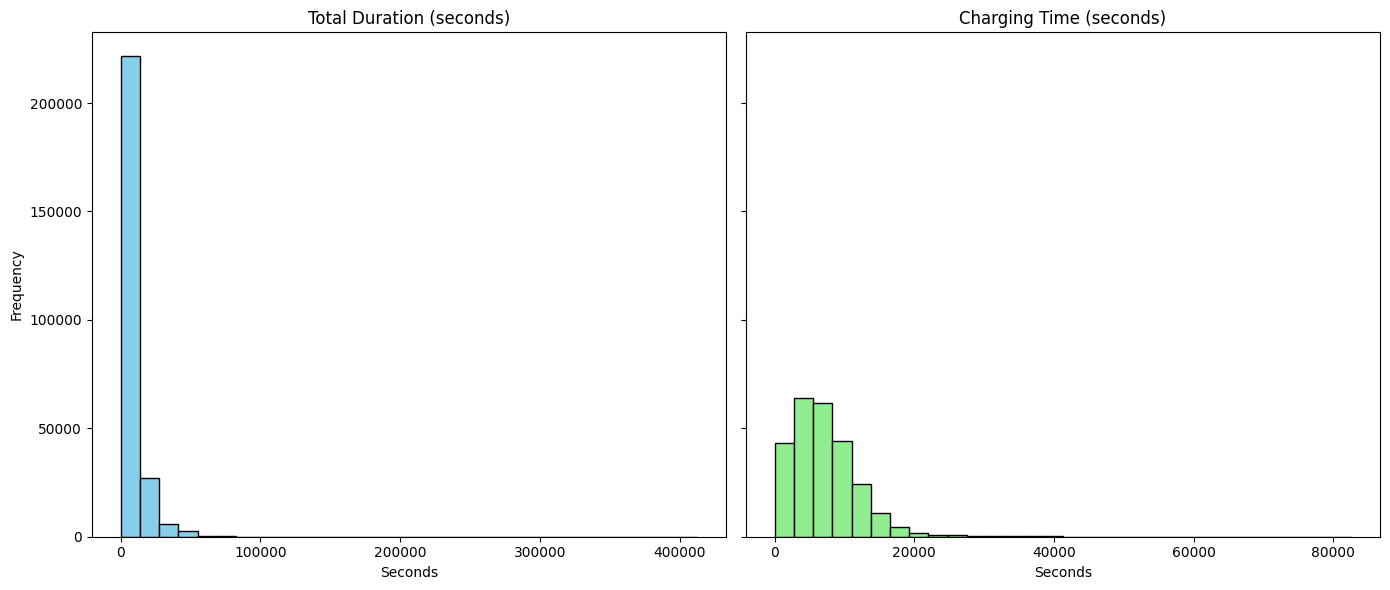

In [19]:
# Create subplots
figh, axesh = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot histogram for Total Duration
axesh[0].hist(numeric_df0['Total Duration (seconds)'], bins=30, color='skyblue', edgecolor='black')
axesh[0].set_title('Total Duration (seconds)')
axesh[0].set_xlabel('Seconds')
axesh[0].set_ylabel('Frequency')

# Plot histogram for Charging Time
axesh[1].hist(numeric_df0['Charging Time (seconds)'], bins=30, color='lightgreen', edgecolor='black')
axesh[1].set_title('Charging Time (seconds)')
axesh[1].set_xlabel('Seconds')

# Adjust layout
plt.tight_layout()
plt.show()

The histogram on the left depicts the distribution of total session duration (in seconds) across all charging events, showing that the majority of sessions have short durations with a long tail indicating some significantly longer sessions. The histogram on the right represents the charging time (in seconds), highlighting a more compact distribution with most sessions falling within a shorter range. This comparison indicates the potential presence of idle time during charging sessions, where vehicles remain plugged in without active charging.. Box plots:

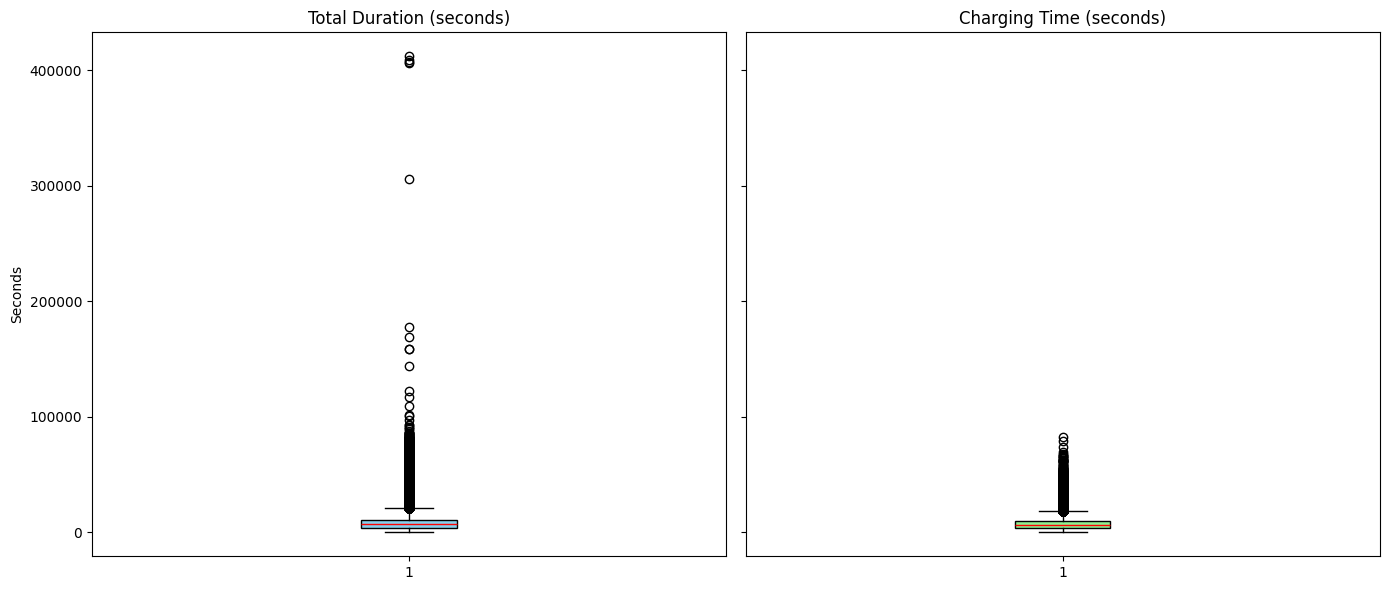

In [20]:
# Create subplots
figb, axesb = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot boxplot for Total Duration
axesb[0].boxplot(numeric_df0['Total Duration (seconds)'].dropna(), patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axesb[0].set_title('Total Duration (seconds)')
axesb[0].set_ylabel('Seconds')

# Plot boxplot for Charging Time
axesb[1].boxplot(numeric_df0['Charging Time (seconds)'].dropna(), patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axesb[1].set_title('Charging Time (seconds)')

# Adjust layout
plt.tight_layout()
plt.show()

The box plots are quite similar, which confirms the comments made based on the table and histograms before. From the table and histograms we saw that the most extreme value for total duration was significantly more extreme than it was for charging time, but now we also see that this is a general trend for total duration. Next it would be interesting to see how observations are distributed across the period of time of the dataframe:

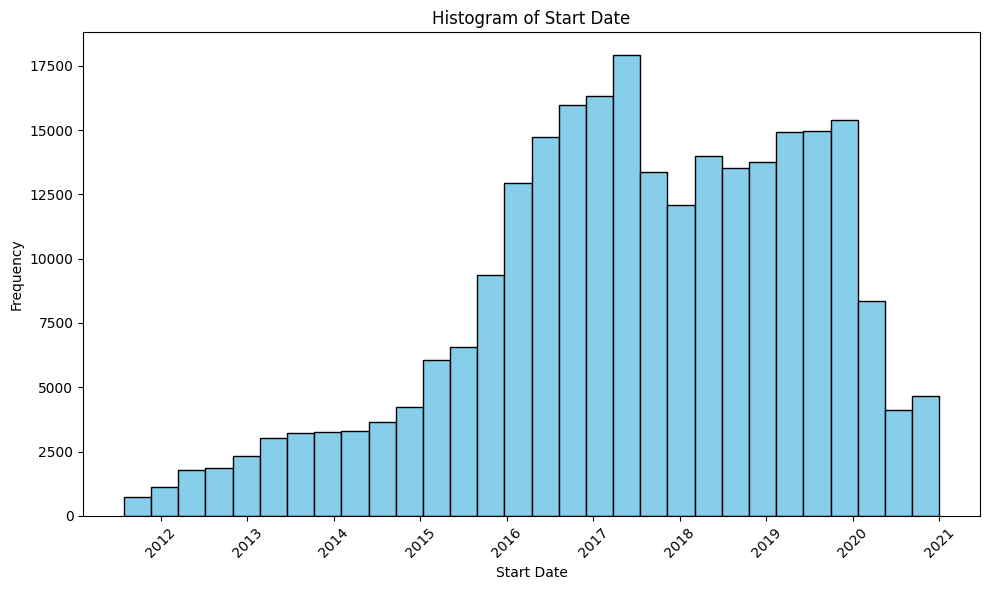

In [21]:
# Convert 'Start Date' to datetime format
start_date = pd.to_datetime(df0['Start Date'], errors='coerce')

# Plot histogram of 'Start Date'
plt.figure(figsize=(10, 6))
plt.hist(start_date, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Start Date')
plt.xlabel('Start Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most observations lie between 2016 and 2020. The increase around 2016 is likely due to electric vehicles becoming more common around this time and the steep fall off around 2020 is probably due to covid-19. Other variables which would be suitable to look at with histograms and box plots are Energy, GHG savings, Gasoline savings and Fee. I will only make the plots for Energy and Fee as Energy, GHG savings and gasoline savings all have a correlation of 1 so analyzing all of them would be redundant. First we make the histogram and box plot for fee (using the dataframe with only non-zero fees):

# Task 1: Clustering

For this task, the goal is to cluster the users based on their weekday/weekend usage patterns as well as their preferred charging start time.

We'll preform K-means and DBSCAN clustering and compare them.

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import timedelta
from permetrics import ClusteringMetric
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import FuncFormatter


# Example usage
pd.set_option('display.width', 200)  # Adjust the width based on your screen size
pd.set_option('display.max_columns', None)  # Show all columns without truncation


In [83]:
# Load the CSV file
def load_csv(path_dataset):
    # Load data into a DataFrame
    data = pd.read_csv(path_dataset)
    return data


# Load data
path_dataset = "../data/EVChargingStationUsage.csv"
original_data = load_csv(path_dataset)
print(f"Dataset shape: {original_data.shape}\n\n")
original_data.head()
original_data.columns


Dataset shape: (259415, 33)




/tmp/ipykernel_3328/1806374918.py:4: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path_dataset)


Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date', 'Start Time Zone', 'End Date', 'End Time Zone', 'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'City', 'State/Province',
       'Postal Code', 'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County', 'System S/N', 'Model Number'],
      dtype='object')

In [84]:
original_data

Station Name          MAC Address            Org Name        Start Date Start Time Zone          End Date End Time Zone Transaction Date (Pacific Time)  \
0           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   City of Palo Alto   7/29/2011 20:17             PDT   7/29/2011 23:20           PDT                 7/29/2011 23:20   
1           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   City of Palo Alto    7/30/2011 0:00             PDT    7/30/2011 0:02           PDT                  7/30/2011 0:02   
2           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   City of Palo Alto    7/30/2011 8:16             PDT   7/30/2011 12:34           PDT                 7/30/2011 12:34   
3           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   City of Palo Alto   7/30/2011 14:51             PDT   7/30/2011 16:55           PDT                 7/30/2011 16:55   
4           PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76   City of Palo Alto   7/30/2011 18:51             PDT   7/30/2011 20:03           PDT                 7/30/2011 20:03   
...                                ...                  ...                 ...               ...             ...               ...           ...                             ...   
259410  PALO ALTO CA / TED THOMPSON #3  0024:B100:0002:9F81  City of Palo Alto   12/31/2020 16:39             PST  12/31/2020 17:14           PST                12/31/2020 17:16   
259411       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  City of Palo Alto   12/31/2020 16:48             PST  12/31/2020 20:31           PST                12/31/2020 20:32   
259412           PALO ALTO CA / MPL #4  0024:B100:0003:CD37  City of Palo Alto   12/31/2020 17:28             PST    1/1/2021 10:56           PST                  1/1/2021 10:57   
259413       PALO ALTO CA / WEBSTER #1  0024:B100:0002:4233  City of Palo Alto   12/31/2020 17:49             PST  12/31/2020 21:55           PST                12/31/2020 21:56   
259414     PALO ALTO CA / CAMBRIDGE #4  0024:B100:0003:3A0A  City of Palo Alto   12/31/2020 18:19             PST  12/31/2020 19:01           PST                12/31/2020 19:02   

       Total Duration (hh:mm:ss) Charging Time (hh:mm:ss)  Energy (kWh)  GHG Savings (kg)  Gasoline Savings (gallons) Port Type  Port Number Plug Type    EVSE ID            Address 1       City  \
0                        3:03:32                  1:54:03      6.249457             2.625                       0.784   Level 2            2     J1772        NaN     250 Hamilton Ave  Palo Alto   
1                        0:02:06                  0:01:54      0.106588             0.045                       0.013   Level 2            2     J1772        NaN     250 Hamilton Ave  Palo Alto   
2                        4:17:32                  4:17:28     14.951777             6.280                       1.876   Level 2            2     J1772        NaN     250 Hamilton Ave  Palo Alto   
3                        2:03:24                  2:02:58      7.159643             3.007                       0.899   Level 2            2     J1772        NaN     250 Hamilton Ave  Palo Alto   
4                        1:11:24                  0:43:54      1.957765             0.822                       0.246   Level 2            2     J1772        NaN     250 Hamilton Ave  Palo Alto   
...                          ...                      ...           ...               ...                         ...       ...          ...       ...        ...                  ...        ...   
259410                   0:35:44                  0:35:18      1.841000             0.773                       0.231   Level 2            2     J1772   344261.0    275 Cambridge Ave  Palo Alto   
259411                   3:43:01                  2:14:04     12.744000             5.352                       1.599   Level 2            2     J1772   104427.0       520 Webster St  Palo Alto   
259412                  17:28:14                  5:08:12     29.665000         

Before we start cleaning the data, let's extract the features we're interested in.

'User ID' and 'Start Date' are required and enough to compute the most common 'Start Time'.

For 'Weekday/Weekend' preference, we use 'Day of week' and 'Total Duration' 

In [85]:
features_df = original_data.copy()


# Use .loc to ensure you are modifying the DataFrame in a safe manner
features_df.loc[:, "Start Date"] = pd.to_datetime(features_df["Start Date"])

# Set the 'Start Date' column as the index
features_df = features_df.set_index("Start Date")
# features_df = features_df[features_df.index.year == 2020]

# Select specific columns
features_df = features_df[["User ID", "Total Duration (hh:mm:ss)"]]

print(features_df.shape)
features_df.head()

(259415, 2)


/home/radugrecu97/dtu/semesters/1/business_analytics/Energy-and-Mobility/.venv/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


User ID Total Duration (hh:mm:ss)
Start Date                                           
2011-07-29 20:17:00  3284.0                   3:03:32
2011-07-30 00:00:00  4169.0                   0:02:06
2011-07-30 08:16:00  4169.0                   4:17:32
2011-07-30 14:51:00  2545.0                   2:03:24
2011-07-30 18:51:00  3765.0                   1:11:24

## Data Cleaning

### NaN Values

Check for NaN values.

In [86]:
def check_nan(df):
    for column in df.columns:
        print(column)
        # Filter the rows where column is NaN
        print(df[df[column].isna()])
        print("\n\n")

check_nan(features_df)

User ID
                    User ID Total Duration (hh:mm:ss)
Start Date                                           
2012-10-13 07:12:00     NaN                   5:36:08
2012-10-13 18:54:00     NaN                   1:24:36
2012-10-14 13:38:00     NaN                   1:01:53
2012-10-14 14:52:00     NaN                   1:08:59
2012-10-14 18:45:00     NaN                   0:19:04
...                     ...                       ...
2020-12-30 14:32:00     NaN                   0:14:41
2020-12-30 17:57:00     NaN                   2:39:12
2020-12-31 11:15:00     NaN                   2:12:09
2020-12-31 11:19:00     NaN                   2:48:41
2020-12-31 14:51:00     NaN                   6:10:05

[7677 rows x 2 columns]



Total Duration (hh:mm:ss)
Empty DataFrame
Columns: [User ID, Total Duration (hh:mm:ss)]
Index: []





Only 'User ID' column has Nan values.

7677 rows consists 2.9% of the total. Since we're interested in targeting individual users in the final model, we choose to drop the NaN entries.

In another case, if we were interested in clustering overall charging station usage, it would make sense to keep these rows as the 'User ID' isn't relevant.

In [87]:
print(features_df.shape)
features_df = features_df.dropna()
print(features_df.shape)

(259415, 2)
(251738, 2)


### Type consistency

In [88]:
def check_dtypes(df):
    # Iterate over all columns in the DataFrame
    for column in df.columns:
        # Get the unique types in the column
        unique_types = df[column].apply(type).unique()
        
        # If the length of unique_types is greater than 1, the column has mixed data types
        if len(unique_types) > 1:
            print(f"The column '{column}' has mixed data types: {unique_types}")
        else:
            print(f"The column '{column}' has a consistent data type: {unique_types[0]}")

check_dtypes(features_df)

The column 'User ID' has mixed data types: [<class 'float'> <class 'str'>]
The column 'Total Duration (hh:mm:ss)' has a consistent data type: <class 'str'>


So it seems 'User ID' has mixed datatypes - floats and strings. Check for non-numeric and numeric strings:

In [89]:
# Separate non-numeric strings
non_numeric_strings = features_df['User ID'][
    features_df['User ID'].apply(lambda x: isinstance(x, str) and not x.isnumeric())
]

# Separate other strings (numeric strings in this case)
numeric_strings = features_df['User ID'][
    features_df['User ID'].apply(lambda x: isinstance(x, str) and x.isnumeric())
]

# Helper function to format and print strings in a grid
def print_strings_in_grid(strings, title, num_columns=10):
    # Convert to array and sample
    sampled_strings = strings.sample(n=min(100, len(strings))).values
    
    # Calculate grid dimensions
    num_rows = (len(sampled_strings) + num_columns - 1) // num_columns
    
    # Pad array if necessary
    padded_array = np.pad(sampled_strings, (0, num_rows * num_columns - len(sampled_strings)), constant_values="")
    
    # Reshape to grid
    rows = padded_array.reshape(num_rows, num_columns)
    
    # Convert to DataFrame for pretty printing
    formatted_df = pd.DataFrame(rows)
    
    # Print the title and formatted grid
    print(f"\n{title}")
    print(formatted_df.to_string(index=False, header=False))

# Print non-numeric strings
print_strings_in_grid(non_numeric_strings, title="Non-Numeric Strings")

# Print numeric strings
print_strings_in_grid(numeric_strings, title="Numeric Strings")



Non-Numeric Strings
 87471V  253V  7603V   973V 100061V   3363V    115V   7603V 7603V   7603V
100161V 3683V 87471V  7603V   3363V    138V 100161V   7603V 7603V    861V
 87471V   93V   117V  6483V     86V    263V    243V 100161V  138V   3363V
  3363V  867V 54211V 87471V 100161V 100061V   3363V  87471V 9353V 100061V
  5127V                                                                  

Numeric Strings
1979351 487893  836068  569697 22189341  355995   667011 444527   100243  126575
 365219 562069  662483  480971   449293  563739   161949 560843   374675  715963
 119863 821495  345097   77113   159617 2081841 22349431 354599   370151  699191
 599697 997831  802551  615475  2486731  173187   417235 130711  3526051  479733
 433215 127397 1371531 3094091   410547  154551 20032291 517017   535777  506393
 266829  96673  188683  202121 20981071  382479   203595 373933   425053  127257
 779957 646105  801945 2307981   340571  524203   487751 129487 20306961  143839
 227715 339287  863968  4

Convert all 'User ID's to string

In [90]:
# Convert 'User ID' to integer for numeric values and leave non-numeric as is
def convert_to_int_if_numeric(value):
    try:
        # If the value is numeric, convert to int
        return int(float(value))
    except ValueError:
        # If it's not numeric (raises ValueError), leave it as it is
        return value
    
# Function to check if a value is numeric
def is_numeric(value):
    try:
        float(value)  # Try to convert the value to float
        return True    # If successful, it is numeric
    except ValueError:
        return False   # If an error occurs, it's not numeric


# # Remove rows with missing, invalid 'User D' and convert to int
features_clean_df = features_df.copy().dropna(subset=["User ID"])
features_clean_df["User ID"] = features_clean_df["User ID"].apply(convert_to_int_if_numeric)
features_clean_df = features_clean_df[features_clean_df["User ID"] != 0]

# Convert 'User ID' column to string type
features_clean_df["User ID"] = features_clean_df["User ID"].astype(str)
print(f"Converted Column\n\n{features_clean_df["User ID"]}\n\n")

# Filter the rows where 'User ID' is not numeric (non-numeric strings)
non_numeric = features_clean_df[~features_clean_df["User ID"].apply(is_numeric)]

# Print the non-numeric User IDs
print(f"Non-Numeric IDs\n{non_numeric[["User ID"]]}")

Converted Column

Start Date
2011-07-29 20:17:00       3284
2011-07-30 00:00:00       4169
2011-07-30 08:16:00       4169
2011-07-30 14:51:00       2545
2011-07-30 18:51:00       3765
                        ...   
2020-12-31 16:39:00    2024201
2020-12-31 16:48:00     242661
2020-12-31 17:28:00     449995
2020-12-31 17:49:00     804075
2020-12-31 18:19:00    2022651
Name: User ID, Length: 251285, dtype: object


Non-Numeric IDs
                     User ID
Start Date                  
2015-09-01 18:13:00     263V
2015-10-16 12:20:00     861V
2016-03-29 18:39:00     243V
2016-05-12 18:18:00     867V
2016-06-10 12:11:00    3683V
2016-08-04 15:16:00      86V
2016-08-30 16:02:00    5127V
2016-09-12 18:21:00     138V
2016-10-05 19:50:00     253V
2016-10-12 13:44:00    3363V
2016-10-14 09:30:00    3363V
2016-10-17 12:43:00    3363V
2016-10-18 10:35:00    3363V
2016-10-19 09:22:00    3363V
2017-03-15 12:38:00    6483V
2017-04-12 18:58:00     973V
2017-05-10 13:48:00    9353V
2017-07-01 19:24

In [91]:
check_dtypes(features_clean_df)

The column 'User ID' has a consistent data type: <class 'str'>
The column 'Total Duration (hh:mm:ss)' has a consistent data type: <class 'str'>


In [92]:
features_clean_df['Total Duration'] = pd.to_timedelta(features_clean_df['Total Duration (hh:mm:ss)'])
features_clean_df = features_clean_df.drop(columns='Total Duration (hh:mm:ss)')
check_dtypes(features_clean_df)

The column 'User ID' has a consistent data type: <class 'str'>
The column 'Total Duration' has a consistent data type: <class 'pandas._libs.tslibs.timedeltas.Timedelta'>


Now all the columns are consistent in data type. We'll convert duration to timedelta type.

In [93]:
features_clean_df

User ID  Total Duration
Start Date                                  
2011-07-29 20:17:00     3284 0 days 03:03:32
2011-07-30 00:00:00     4169 0 days 00:02:06
2011-07-30 08:16:00     4169 0 days 04:17:32
2011-07-30 14:51:00     2545 0 days 02:03:24
2011-07-30 18:51:00     3765 0 days 01:11:24
...                      ...             ...
2020-12-31 16:39:00  2024201 0 days 00:35:44
2020-12-31 16:48:00   242661 0 days 03:43:01
2020-12-31 17:28:00   449995 0 days 17:28:14
2020-12-31 17:49:00   804075 0 days 04:05:34
2020-12-31 18:19:00  2022651 0 days 00:42:07

[251285 rows x 2 columns]

# Data Preparation:

Again, we're interested in clustering the users based on their weekday/weekend usage patterns as well as their preferred charging start time.
So we need to extract the starting time and day of the week for each charging event.

We'll split the 'Start Date' into 'Start Time'(hh:mm) and 'Day of the week'.

In [94]:
# Assuming 'Start Date' is already a datetime column
deconstructed_df = features_clean_df.copy()
deconstructed_df = deconstructed_df.reset_index()
deconstructed_df = deconstructed_df.set_index("User ID")

# Extract day of the week and hour into new columns
deconstructed_df['Day of Week'] = deconstructed_df['Start Date'].dt.day_name()  # Extract day of the week
# Extract the hour and minute from the 'Start Date' column
deconstructed_df['Start Time'] = deconstructed_df['Start Date'].dt.strftime('%H:%M')

# Drop the original 'hh:mm:ss' columns as they are no longer needed
deconstructed_df = deconstructed_df.drop(columns=['Start Date'])

deconstructed_df = deconstructed_df.reset_index()

deconstructed_df = deconstructed_df.set_index("User ID")

deconstructed_df

Total Duration Day of Week Start Time
User ID                                       
3284    0 days 03:03:32      Friday      20:17
4169    0 days 00:02:06    Saturday      00:00
4169    0 days 04:17:32    Saturday      08:16
2545    0 days 02:03:24    Saturday      14:51
3765    0 days 01:11:24    Saturday      18:51
...                 ...         ...        ...
2024201 0 days 00:35:44    Thursday      16:39
242661  0 days 03:43:01    Thursday      16:48
449995  0 days 17:28:14    Thursday      17:28
804075  0 days 04:05:34    Thursday      17:49
2022651 0 days 00:42:07    Thursday      18:19

[251285 rows x 3 columns]

We round 'Start Time' to the nearest 5 minutes so it's easier to compute the mode.

In [95]:
# Convert 'Start Time' to datetime if it's not already
deconstructed_df['Start Time'] = pd.to_datetime(deconstructed_df['Start Time'])

# Round 'Start Time' to the nearest 5 minutes
deconstructed_df['Start Time'] = deconstructed_df['Start Time'].dt.round('5min')

deconstructed_df

/tmp/ipykernel_3328/3420077491.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deconstructed_df['Start Time'] = pd.to_datetime(deconstructed_df['Start Time'])


Total Duration Day of Week          Start Time
User ID                                                
3284    0 days 03:03:32      Friday 2024-12-08 20:15:00
4169    0 days 00:02:06    Saturday 2024-12-08 00:00:00
4169    0 days 04:17:32    Saturday 2024-12-08 08:15:00
2545    0 days 02:03:24    Saturday 2024-12-08 14:50:00
3765    0 days 01:11:24    Saturday 2024-12-08 18:50:00
...                 ...         ...                 ...
2024201 0 days 00:35:44    Thursday 2024-12-08 16:40:00
242661  0 days 03:43:01    Thursday 2024-12-08 16:50:00
449995  0 days 17:28:14    Thursday 2024-12-08 17:30:00
804075  0 days 04:05:34    Thursday 2024-12-08 17:50:00
2022651 0 days 00:42:07    Thursday 2024-12-08 18:20:00

[251285 rows x 3 columns]

Now, we compute total charging durations during weekends and work days.

Also, we compute the 'Start Time' mode.

In [96]:
# Step 1: Copy the existing DataFrame for manipulation
dated_df = deconstructed_df.copy()

# Step 2: Add a column to identify weekends
dated_df['Weekend'] = dated_df['Day of Week'].isin(['Saturday', 'Sunday']).astype(int)

# Step 3: Calculate total duration breakdown by weekday and weekend
# Ensure 'Total Duration' is in timedelta format (convert if necessary)
if not np.issubdtype(dated_df['Total Duration'].dtype, np.timedelta64):
    dated_df['Total Duration'] = pd.to_timedelta(dated_df['Total Duration'], errors='coerce')

# Group by 'User ID' and 'Weekend' to calculate total duration
duration_breakdown_df = dated_df.groupby(['User ID', 'Weekend'])['Total Duration'].sum().unstack(fill_value=pd.Timedelta(0))

# Rename columns to represent weekdays and weekends
duration_breakdown_df.columns = ['Weekday Duration', 'Weekend Duration']

# Step 4: Ensure 'Start Time' is in datetime format
if not np.issubdtype(dated_df['Start Time'].dtype, np.datetime64):
    dated_df['Start Time'] = pd.to_datetime(dated_df['Start Time'], errors='coerce')

# Step 5: Extract hours and minutes directly using datetime attributes
dated_df['Start Hour'] = dated_df['Start Time'].dt.hour
dated_df['Start Minute'] = dated_df['Start Time'].dt.minute

# Step 6: Create a new 'Start Time (hh:mm)' column for mode computation
dated_df['Start Time (hh:mm)'] = (
    dated_df['Start Hour'].astype(str).str.zfill(2) + ":" + dated_df['Start Minute'].astype(str).str.zfill(2)
)

# Step 7: Calculate the mode start time for each user
mode_start_time = (
    dated_df.groupby('User ID')['Start Time (hh:mm)']
    .agg(lambda x: x.mode()[0])  # If there are multiple modes, pick the first
)

# Step 8: Add the mode start time as a new column to `duration_breakdown_df`
duration_breakdown_df['Mode Start Time'] = mode_start_time

# Display the updated DataFrame
duration_breakdown_df

Weekday Duration Weekend Duration Mode Start Time
User ID                                                  
1000031  0 days 03:36:46  0 days 00:00:00           18:30
1000311  0 days 02:24:42  0 days 00:00:00           19:20
100061V  0 days 09:19:57  0 days 00:00:00           07:55
10013    0 days 02:37:35  0 days 00:00:00           15:40
100161V  0 days 07:08:53  0 days 00:00:00           08:40
...                  ...              ...             ...
998031   0 days 10:07:32  0 days 00:00:00           08:40
99823    0 days 04:17:42  0 days 00:57:25           11:10
998481   0 days 02:50:47  0 days 00:00:00           08:35
998781   0 days 01:53:39  0 days 00:00:00           12:15
99943    0 days 23:05:12  0 days 00:00:00           16:30

[21440 rows x 3 columns]

In [97]:
# Copy the duration_breakdown_df into summary_ratio_df
summary_ratio_df = duration_breakdown_df.copy()

# Define a small epsilon to avoid division by zero
epsilon = 1e-9

# Convert 'Weekend Duration' and 'Weekday Duration' to total seconds (numeric format)
summary_ratio_df['Weekend Duration (seconds)'] = summary_ratio_df['Weekend Duration'].dt.total_seconds()
summary_ratio_df['Weekday Duration (seconds)'] = summary_ratio_df['Weekday Duration'].dt.total_seconds()

# Compute the logarithmic difference between weekend and weekday durations (now in seconds)
summary_ratio_df['Charging day preference score'] = np.log(summary_ratio_df['Weekend Duration (seconds)'] + epsilon) - np.log(summary_ratio_df['Weekday Duration (seconds)'] + epsilon)

# Convert 'Mode Start Time' to seconds (same as before)
def time_to_seconds(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours * 3600 + minutes * 60

# Convert 'Mode Start Time' to seconds and add it to the DataFrame
summary_ratio_df['Mode Start Time (seconds)'] = summary_ratio_df['Mode Start Time'].apply(time_to_seconds)

# Drop the original 'Mode Start Time' column and the duration columns
summary_ratio_df = summary_ratio_df.drop(columns=['Mode Start Time', 'Weekday Duration', 'Weekend Duration'])

# Sort the DataFrame by the "Charging day preference score" column
summary_ratio_df = summary_ratio_df.sort_values(by='Charging day preference score', ascending=False)

summary_ratio_df = summary_ratio_df.drop(columns=['Weekend Duration (seconds)', 'Weekday Duration (seconds)'])
# Display the sorted DataFrame
summary_ratio_df


Charging day preference score  Mode Start Time (seconds)
User ID                                                          
683735                       33.970897                      26400
190181                       33.773254                      22800
134631                       33.534627                      52800
2020411                      33.266974                      65400
208185                       33.162472                      36300
...                                ...                        ...
428051                      -36.229551                      70800
203595                      -36.260987                      25800
639087                      -36.262778                      34200
126575                      -36.406357                      21600
360003                      -36.463986                      24000

[21440 rows x 2 columns]

Standardize ONLY the Mode Start Time because the 'Charding day preference score' is already log normalized.

We did try standardizing both but that led to worse clustering.

In [98]:
# Copy the original DataFrame to avoid modifying it directly
summary_ratio_std_df = summary_ratio_df.copy()

# Standardize 'Median Start Time (seconds)'
scaler = StandardScaler()
summary_ratio_std_df['Mode Start Time (seconds)'] = scaler.fit_transform(summary_ratio_std_df[['Mode Start Time (seconds)']])

# Display the resulting DataFrame
summary_ratio_std_df


Charging day preference score  Mode Start Time (seconds)
User ID                                                          
683735                       33.970897                  -1.712880
190181                       33.773254                  -1.975323
134631                       33.534627                   0.211709
2020411                      33.266974                   1.130262
208185                       33.162472                  -0.991159
...                                ...                        ...
428051                      -36.229551                   1.523928
203595                      -36.260987                  -1.756620
639087                      -36.262778                  -1.144251
126575                      -36.406357                  -2.062805
360003                      -36.463986                  -1.887842

[21440 rows x 2 columns]

### K-Means

In [99]:
def print_elbow_plot(scaled_df, title_suffix):
    wcss = []  # List to store within-cluster sum of squares

    # Calculate WCSS for cluster numbers ranging from 1 to 10
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(scaled_df)
        wcss.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to the closest cluster center

    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title(f'Optimal Number of Clusters for {title_suffix}')
    plt.xticks(np.arange(1, 11, 1))  # Ensure all cluster numbers are shown
    plt.grid(True)
    plt.show()

To determine the number of clusters for k-means, we use the elbow plot:

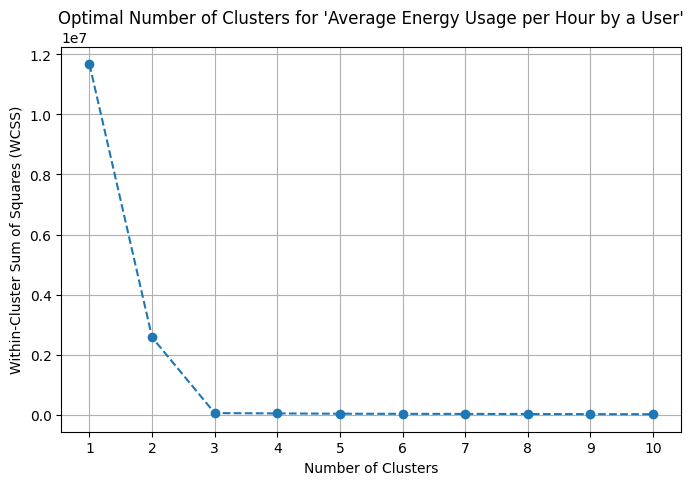

In [100]:
print_elbow_plot(summary_ratio_std_df, "'Average Energy Usage per Hour by a User'")

Compute k-means

In [109]:
from matplotlib.ticker import MaxNLocator, FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def seconds_to_hhmm(seconds):
    """Converts seconds into hh:mm format."""
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    return f"{hours:02}:{minutes:02}"

def print_kmeans(df, scaled_df, n_clusters, x_name, y_name, x_label, y_label, title):
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model and predict clusters
    df['Cluster'] = kmeans.fit_predict(scaled_df)

    # Ensure scaled_df is a NumPy array for ClusteringMetric
    scaled_array = scaled_df.to_numpy()
    
    # Compute Silhouette Score
    silhouette_avg = silhouette_score(scaled_array, df['Cluster'].values)
    
    # Scatter plot with KMeans clusters
    plt.figure(figsize=(14, 6))  # Increased width to 14 to make it wider
    
    sns.scatterplot(
        x=df[x_name],
        y=df[y_name],
        hue=df['Cluster'],
        palette=sns.color_palette(),  # Clearer color palette
        s=15,
        alpha=0.5
    )

    # Format the y-axis from seconds to hh:mm
    ax = plt.gca()
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: seconds_to_hhmm(x)))
    
    # Set ticks for each hour (0 to 23)
    ticks = [i * 3600 for i in range(24)]  # Create ticks at 0, 1, 2, ..., 23 hours
    ax.set_xticks(ticks)  # Set these as the x-tick positions
    
    # Rotate the x-axis ticks for better readability
    plt.xticks(rotation=45)  # Adjust the rotation angle as needed (45 degrees in this case)
    
    # Adjust bottom space to accommodate the scores
    plt.subplots_adjust(bottom=0.25)  # Increase bottom margin

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Add DBCV and Silhouette scores below the X-axis
    plt.figtext(
        0.6, 0.05,  # Position at the center and near the bottom
        f"Silhouette Score: {silhouette_avg:.2f}", 
        wrap=True, horizontalalignment='center', fontsize=12, color='black'
    )

    # Move legend to the bottom left corner outside the plot
    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(0, -0.2), ncol=n_clusters)

    # Show the plot
    plt.show()


/tmp/ipykernel_3328/897697003.py:29: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


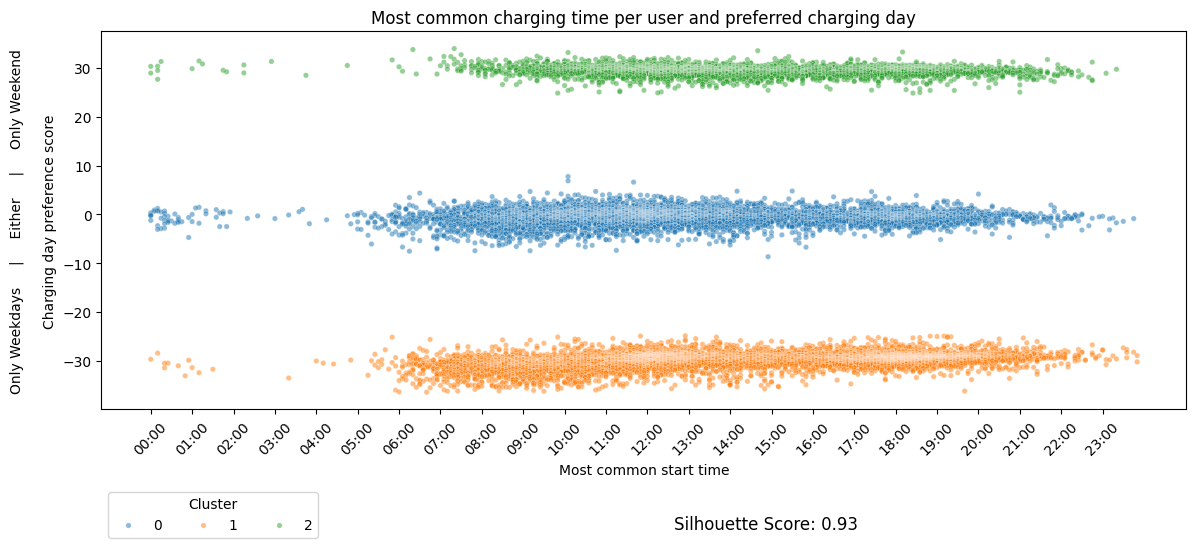

In [111]:
print_kmeans(df=summary_ratio_df,
             scaled_df=summary_ratio_std_df,
             n_clusters=3,
             x_name="Mode Start Time (seconds)",	
             y_name="Charging day preference score",
             x_label="Most common start time",
             y_label="Only Weekdays     |     Either     |     Only Weekend\n\n"
                     "Charging day preference score",
             title="Most common charging time per user and preferred charging day")

There's 3 distinct clusters that group users into their preferred charging period.

On the X axis, as you go further out from the center, the longer a user had a car connected to the charging station.

For the middle and bottom cluster, there seem to be considerably more users charging in the first part of the day comporated to the top cluster.

It makes sense as during the weekend, the users might wake up later or not be in the city area if they only work but not live there.
Also, there's less exclusive weekend users overall.

The Silhouette Score is near 1 and indicates a good separation of clusters.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

## Introduction

We start by opening the data and creating a pandas dataframe with all the information form the dataset. We set the "Start Date" field as the index to make data manipulation easier.

In [3]:
df = pd.read_csv("../data/EVChargingStationUsage.csv")
df["Start Date"] = pd.to_datetime(df["Start Date"])
df["Charging Time (hh:mm:ss)"] = pd.to_timedelta(df["Charging Time (hh:mm:ss)"])
df = df.set_index(df["Start Date"])

C:\Users\vbran\AppData\Local\Temp\ipykernel_8520\587786845.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/EVChargingStationUsage.csv")


We will only use fields described below for the task of predicting consumption. 

In [4]:
df = df[["Address 1", "Energy (kWh)", "Charging Time (hh:mm:ss)"]]
df

Address 1  Energy (kWh)  \
Start Date                                               
2011-07-29 20:17:00     250 Hamilton Ave      6.249457   
2011-07-30 00:00:00     250 Hamilton Ave      0.106588   
2011-07-30 08:16:00     250 Hamilton Ave     14.951777   
2011-07-30 14:51:00     250 Hamilton Ave      7.159643   
2011-07-30 18:51:00     250 Hamilton Ave      1.957765   
...                                  ...           ...   
2020-12-31 16:39:00    275 Cambridge Ave      1.841000   
2020-12-31 16:48:00       520 Webster St     12.744000   
2020-12-31 17:28:00  3700 Middlefield Rd     29.665000   
2020-12-31 17:49:00       520 Webster St     11.976000   
2020-12-31 18:19:00    475 Cambridge Ave      1.571000   

                    Charging Time (hh:mm:ss)  
Start Date                                    
2011-07-29 20:17:00          0 days 01:54:03  
2011-07-30 00:00:00          0 days 00:01:54  
2011-07-30 08:16:00          0 days 04:17:28  
2011-07-30 14:51:00          0 days 02:02:58  
2011-07-30 18:51:00          0 days 00:43:54  
...                                      ...  
2020-12-31 16:39:00          0 days 00:35:18  
2020-12-31 16:48:00          0 days 02:14:04  
2020-12-31 17:28:00          0 days 05:08:12  
2020-12-31 17:49:00          0 days 03:53:42  
2020-12-31 18:19:00          0 days 00:41:44  

[259415 rows x 3 columns]

## Data cleaning and reformating

Now we have to reformat the data so that instead of displaying consumption for each time a car was charged on a station, we want to have aggrigated data with total consumption for the whole hour for each of the stations. We will use 2 assumptions to get this: The first is a constant consumption throughout the whole charging period and the second one is that every car starts charging immediately after arriving at the charging station.

In [5]:
max_charge_time = max(df["Charging Time (hh:mm:ss)"])
def get_hourly_consumption(df: pd.DataFrame) -> pd.Series:
    first_datetime = df.index.min().replace(minute=0, second=0)
    last_datetime = (df.index.max() + max_charge_time).replace(minute=0, second=0)
    hourly_index = pd.date_range(first_datetime, last_datetime, freq="h")
    hourly_df = pd.Series(0.0, index=hourly_index)
    for index, row in df.iterrows():
        current_datetime = index
        total_consumption = row["Energy (kWh)"]
        total_duration = row["Charging Time (hh:mm:ss)"]
        end_datetime = index + total_duration
        while current_datetime < end_datetime:
            start_hour = current_datetime.replace(minute=0, second=0)   #type: ignore
            end_hour = start_hour + pd.Timedelta(hours=1)
            sub_duration = min(end_hour, end_datetime) - current_datetime
            sub_consumption = total_consumption * sub_duration / total_duration
            hourly_df[start_hour] += sub_consumption
            current_datetime = end_hour
    return hourly_df

In [6]:
station_names = df['Address 1'].unique()
len(station_names)

20

There are a total of 20 charging stations in the dataset. Lets create a dictionary with station names as keys and hourly energy consumption dataframe as values.

In [7]:
hourly_consumption_by_station = dict()
for i, station_name in enumerate(station_names):
    station_df = df[df["Address 1"] == station_name]
    consumption = get_hourly_consumption(station_df)
    hourly_consumption_by_station[station_name] = consumption

In [8]:
hourly_consumption_by_station["250 Hamilton Ave"].head()

2011-07-29 20:00:00    2.356218
2011-07-29 21:00:00    3.287746
2011-07-29 22:00:00    0.605493
2011-07-29 23:00:00    0.000000
2011-07-30 00:00:00    0.106588
Freq: H, dtype: float64

## Seasonality and trend visualisation

Now we plot hourly, daily and monthly graphs for 3 arbitrarily chosen stations to observe seasonality and trends in our data.

In [7]:
def plot_consumption(hourly_consumption: pd.Series):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    plot_day_consumption(hourly_consumption, axes[0])
    plot_week_consumption(hourly_consumption, axes[1])
    plot_year_consumption(hourly_consumption, axes[2])
    plt.show()

def plot_day_consumption(hourly_consumption: pd.Series, ax):
    if type(hourly_consumption.index) != pd.DatetimeIndex:
        raise ValueError("The index of the input Series must be a DatetimeIndex")
    hourly_grouped = hourly_consumption.groupby(hourly_consumption.index.hour)
    data = [hourly_grouped.get_group(hour).values for hour in range(24) if hour in hourly_grouped.groups]
    ax.boxplot(data, positions=range(len(data)), widths=0.6, patch_artist=True, showmeans=True, showfliers=False)
    ax.set_xlabel("Hour of the day")
    ax.set_ylabel("Average consumption (kWh)")
    ax.set_title("Average consumption per hour of the day")
    legend_elements = [
        plt.Line2D([0], [0], color='orange', lw=2, label='Median'), #type: ignore
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean') #type: ignore
    ]
    ax.legend(handles=legend_elements, loc='upper right')

def plot_week_consumption(hourly_consumption: pd.Series, ax):
    # Group data by day of the week
    if type(hourly_consumption.index) != pd.DatetimeIndex:
        raise ValueError("The index of the input Series must be a DatetimeIndex")
    weekly_data = [
        hourly_consumption[hourly_consumption.index.dayofweek == day].values
        for day in range(7)
    ]
    
    # Draw the boxplot
    ax.boxplot(weekly_data, positions=range(7), widths=0.6, patch_artist=True, showmeans=True, showfliers=False)
    ax.set_xlabel("Day of the week")
    ax.set_ylabel("Consumption (kWh)")
    ax.set_title("Distribution of Consumption per Day of the Week")
    ax.set_xticks(range(7))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    legend_elements = [
        plt.Line2D([0], [0], color='orange', lw=2, label='Median'), #type: ignore
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean') #type: ignore
    ]
    ax.legend(handles=legend_elements, loc='upper right')


def plot_year_consumption(hourly_consumption: pd.Series, ax):
    if type(hourly_consumption.index) != pd.DatetimeIndex:
        raise ValueError("The index of the input Series must be a DatetimeIndex")
    # Group data by month
    monthly_data = [
        hourly_consumption[hourly_consumption.index.month == month].values
        for month in range(1, 13)
    ]
    
    # Draw the boxplot
    ax.boxplot(monthly_data, positions=range(1, 13), widths=0.6, patch_artist=True, showmeans=True, showfliers=False)
    ax.set_xlabel("Month")
    ax.set_ylabel("Consumption (kWh)")
    ax.set_title("Distribution of Consumption per Month")
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels([
        "Jan", "Feb", "Mar", "Apr", "May", "Jun",
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
    ])
    legend_elements = [
        plt.Line2D([0], [0], color='orange', lw=2, label='Median'), #type: ignore
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean') #type: ignore
    ]
    ax.legend(handles=legend_elements, loc='upper right')


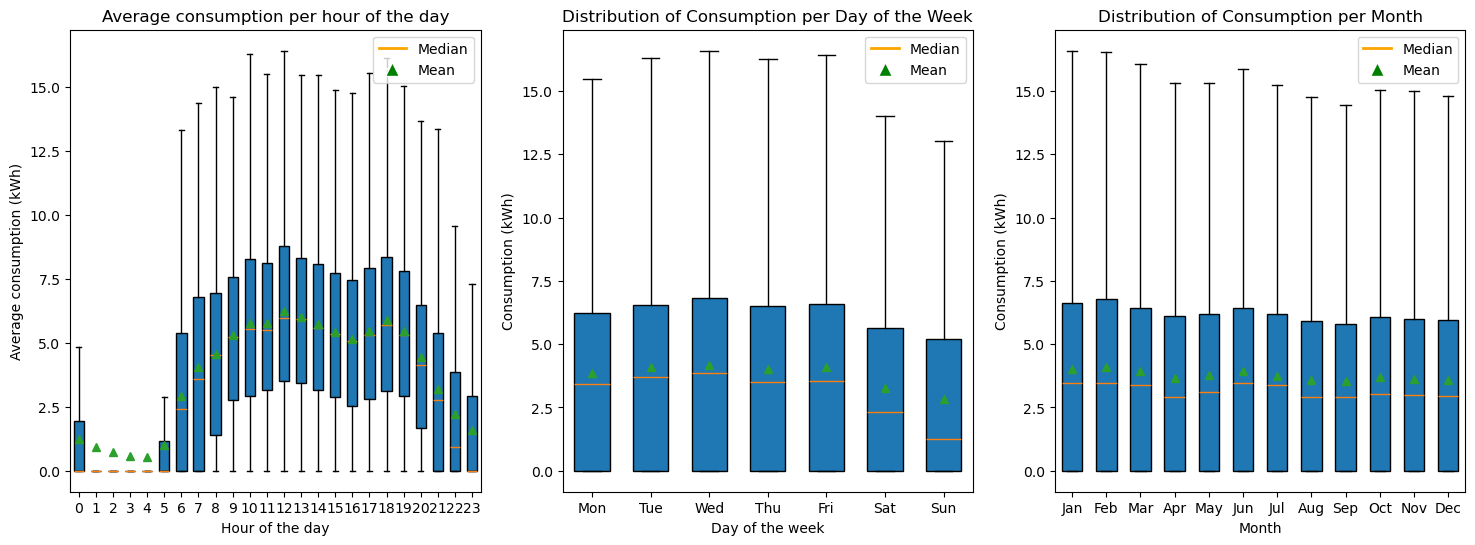

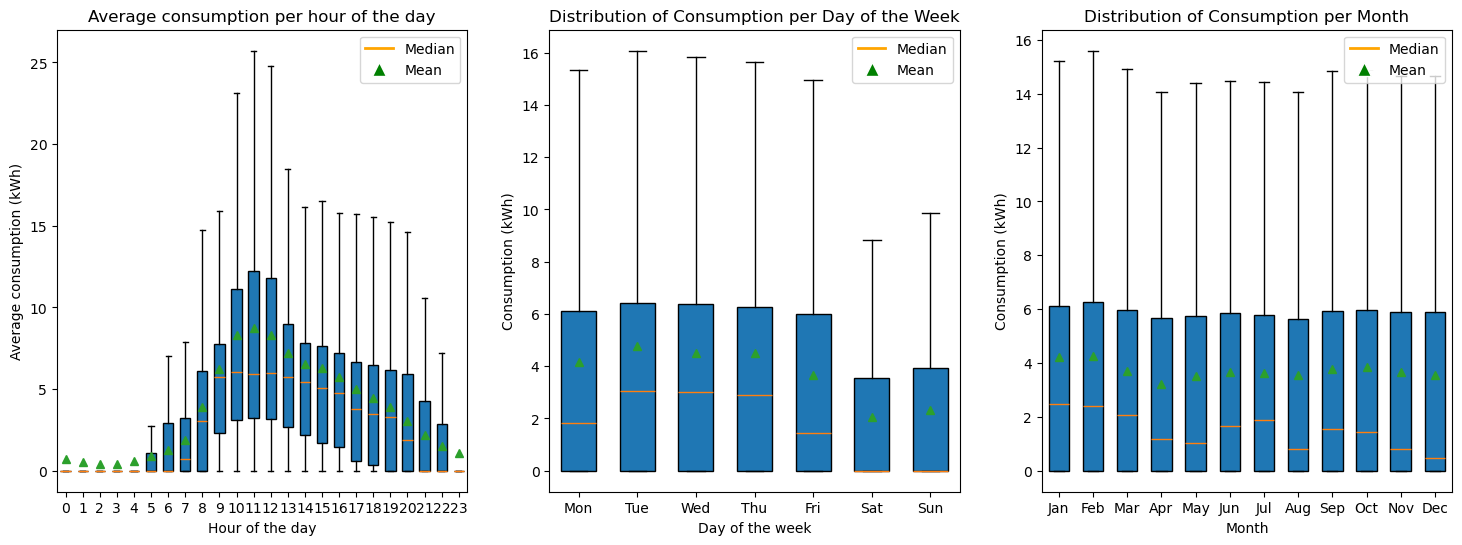

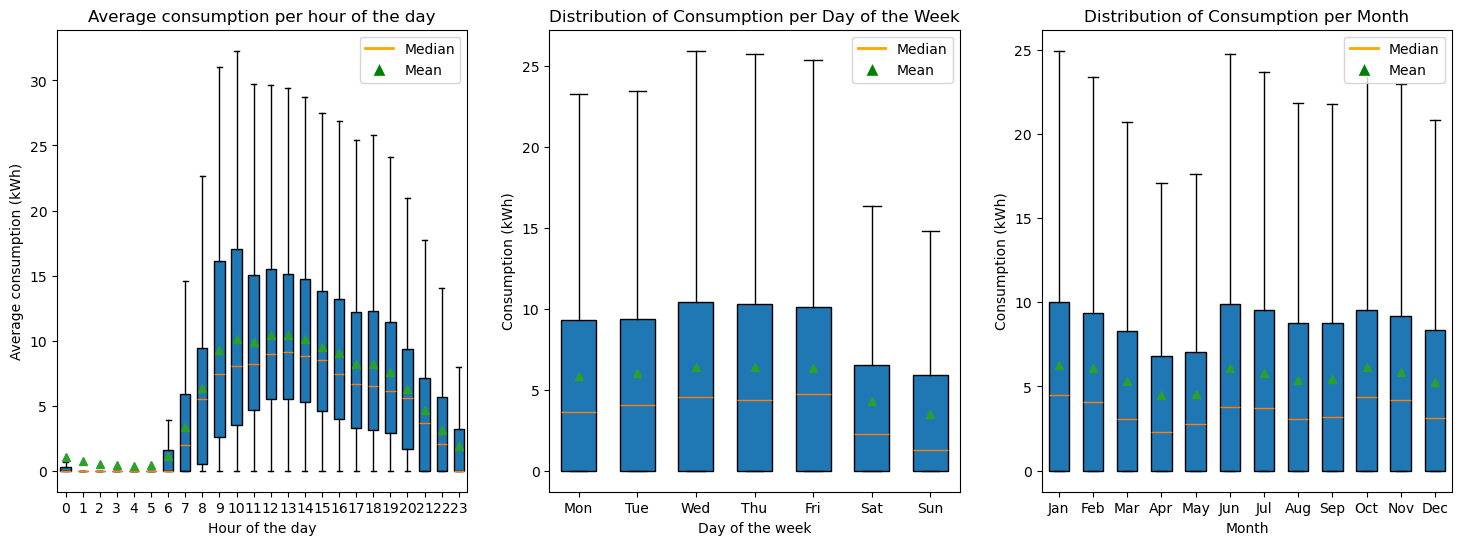

In [8]:
selected_stations = ["250 Hamilton Ave", "275 Cambridge Ave", "520 Webster St"]
for station_name in selected_stations:
    plot_consumption(hourly_consumption_by_station[station_name])

We can see the consumption is higher during the day and during weekdays. Consumption during different months seems to be more balanced, depending on the station.

Now lets visualize the trends in the data for the same 3 stations. We used daily consumption to make the graphs more readable.

In [9]:
def plot_trends(hourly_consumption: pd.Series):
    daily_consumption = hourly_consumption.resample("D").sum()
    weekly_window = daily_consumption.rolling(window=7).mean()
    yearly_window = daily_consumption.rolling(window=365).mean()

    # Plot daily, 7-day rolling mean, and 365-day rolling mean time series
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(daily_consumption, marker='.', markersize=2, color='0.6',
    linestyle='None', label='Daily')
    ax.plot(weekly_window, linewidth=2, label='7-d Rolling Mean')
    ax.plot(yearly_window, color='0.2', linewidth=3,
    label='Trend (365-d Rolling Mean)')

    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Consumption (kWh)')
    ax.set_title('Charging Station Consumption Trend')

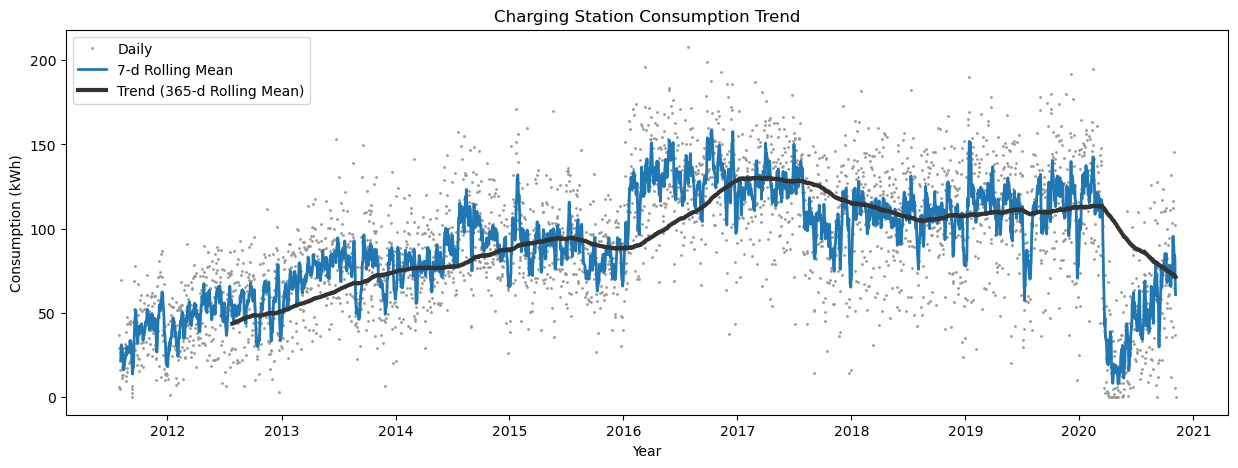

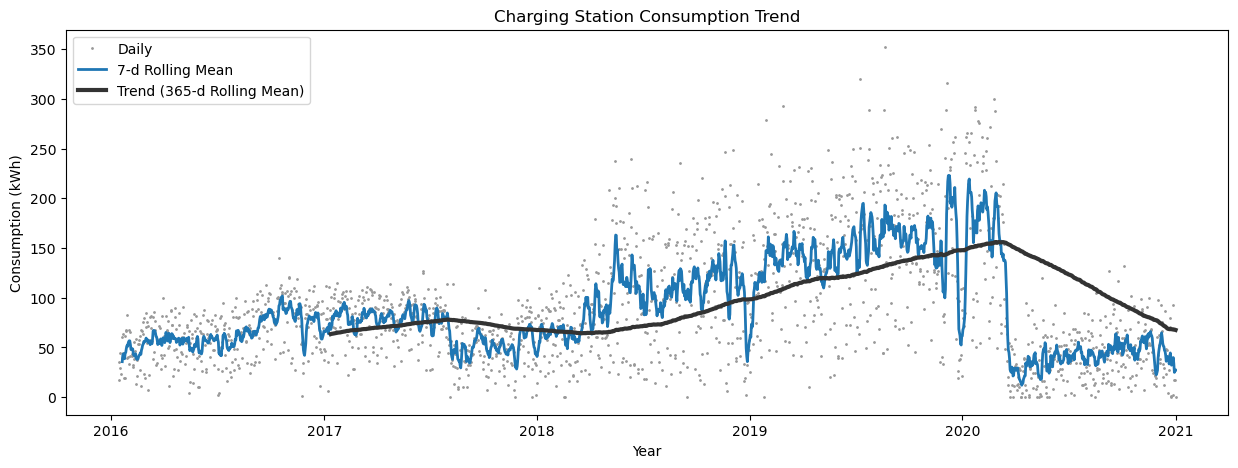

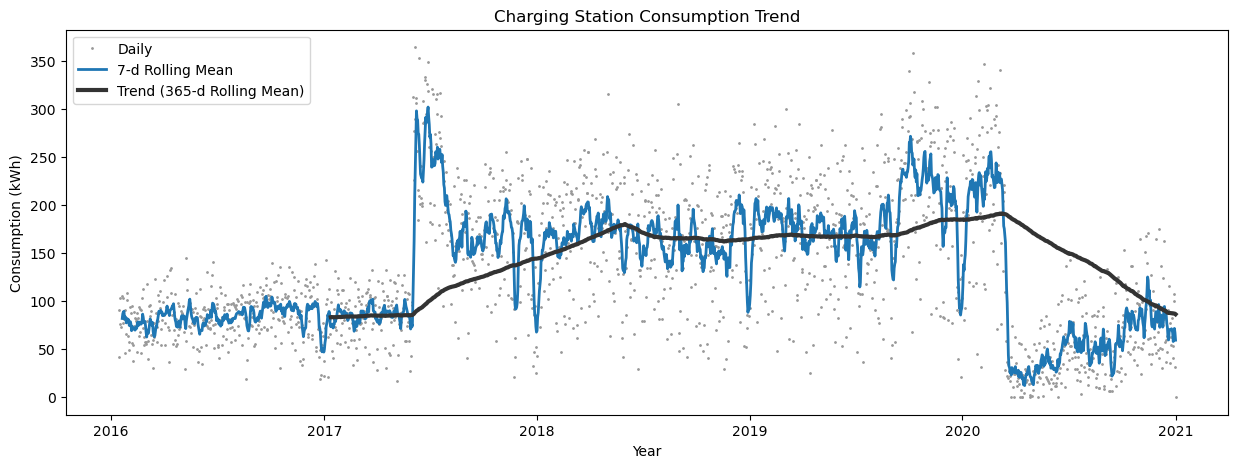

In [10]:
for station_name in selected_stations:
    plot_trends(hourly_consumption_by_station[station_name])

An interesting change of trends seem to occur in year 2020, probably due to the global pandemic.

## Autocorrelation and partial autocorrelation

Before building any model, we need to see how many datapoints from the past should we use in our autoregressive model. We can use plot_acf and plot_pacf methods to help us decide.

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_autocorrelations(consumption: pd.Series):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    plot_acf(consumption, ax=axs[0])
    plot_pacf(consumption, ax=axs[1])
    plt.show()

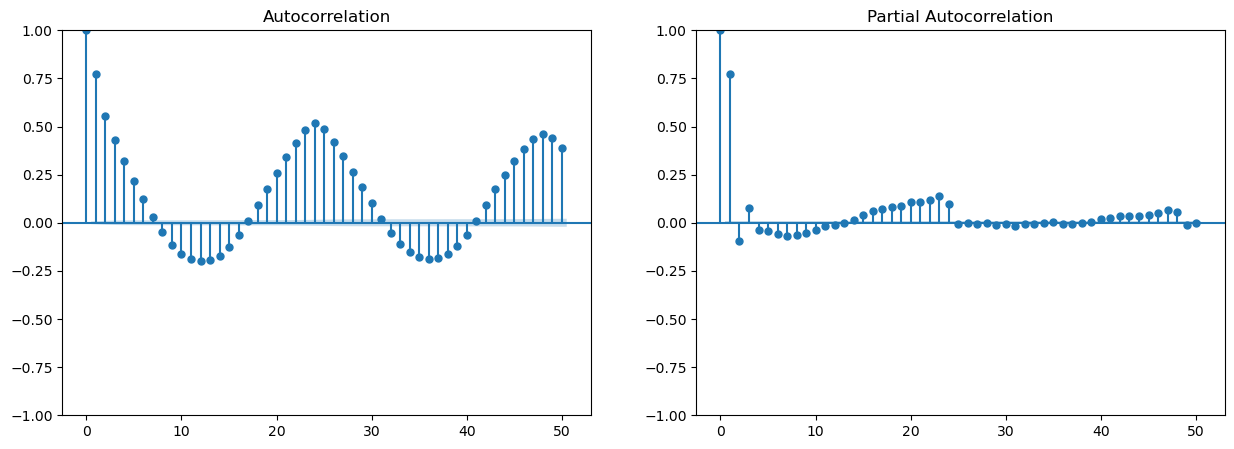

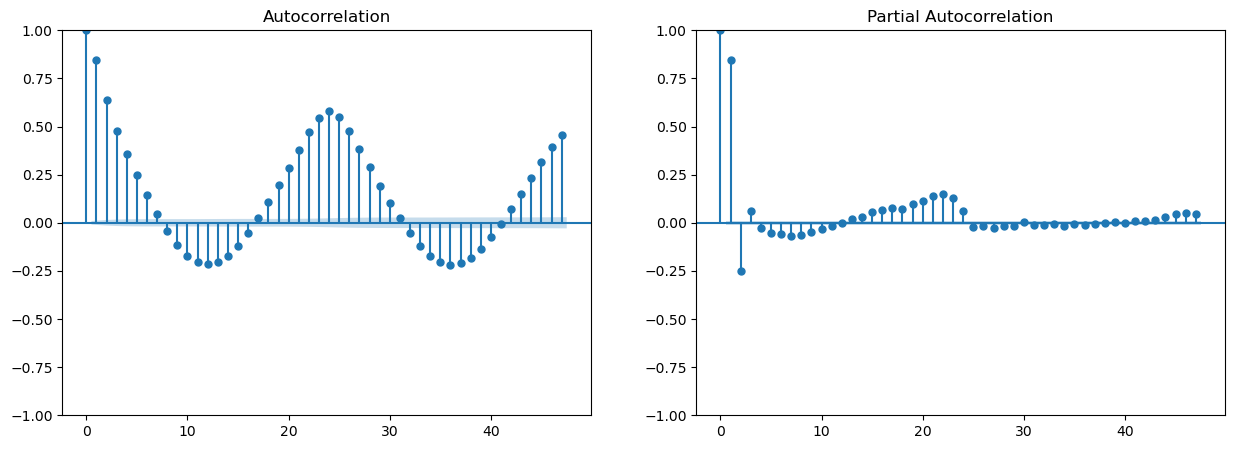

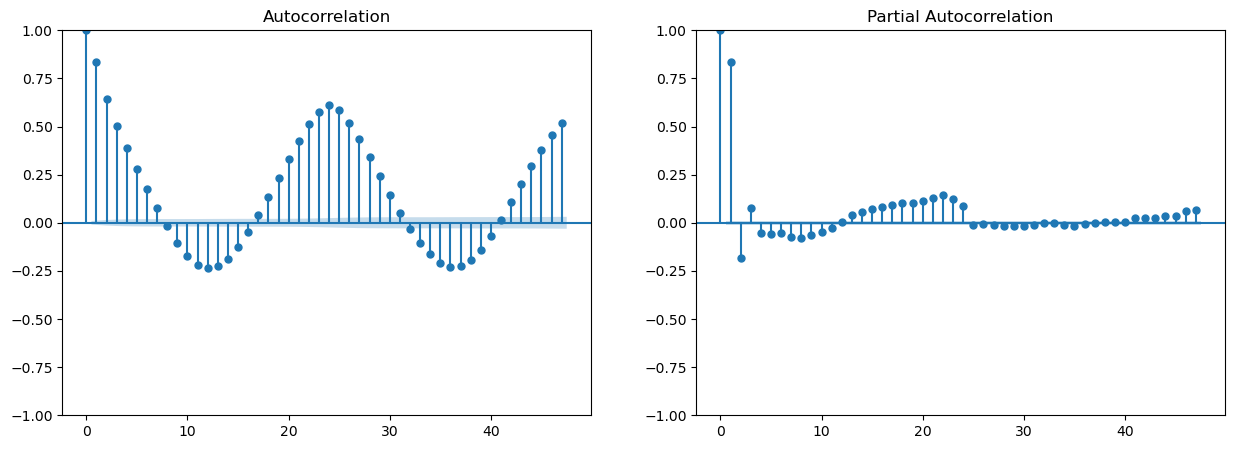

In [12]:
for station_name in selected_stations:
    plot_autocorrelations(hourly_consumption_by_station[station_name])

The graphs suggest that using past 3 hours along with the same hour of the previous days (indicated by the peak at 24 hour delay in the graphs).

## Stationarity

The last step before building a model is determining stationarity. Looking at the graphs in the trend section, the data does not seem to stationary, but we can confirm that with a ADF test.

In [13]:
from statsmodels.tsa.stattools import adfuller

def print_adf_results(consumption: pd.Series):
    result = adfuller(consumption)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():    #type: ignore
        print('\t%s: %.3f' % (key, value))

We will perform the test on both hourly and daily data

In [14]:
for station_name in selected_stations:
    print(f"Station: {station_name}")
    print_adf_results(hourly_consumption_by_station[station_name])

Station: 250 Hamilton Ave
ADF Statistic: -17.327079
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Station: 275 Cambridge Ave
ADF Statistic: -16.691114
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Station: 520 Webster St
ADF Statistic: -14.263183
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [15]:
for station_name in selected_stations:
    print(f"Station: {station_name}")
    print_adf_results(hourly_consumption_by_station[station_name].resample("D").sum())

Station: 250 Hamilton Ave
ADF Statistic: -3.040040
p-value: 0.031321
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Station: 275 Cambridge Ave
ADF Statistic: -2.656086
p-value: 0.081950
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Station: 520 Webster St
ADF Statistic: -2.869156
p-value: 0.049054
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Interestingly, the hourly data seems to be stationary while daily data does not. The reason might be that there is a long term trend (over years) which hourly test can't detect.

## Creating training and test data

In [16]:
test_size = 0.3
training_data = dict()
test_data = dict()

for station_name, hourly_df in hourly_consumption_by_station.items():
    if len(hourly_df) < 7 * 24:
        print(f"Skipping {station_name} due to insufficient data")
        continue

    # Calculate the split index based on test size
    split_index = int(len(hourly_df) * (1 - test_size))
    
    # Get the timestamp corresponding to the split index
    split_timestamp = hourly_df.index[split_index]
    
    # Adjust the split index to the next midnight (start of the day)
    adjusted_split_index = hourly_df.index.get_loc(
        hourly_df[hourly_df.index >= split_timestamp.normalize()].index[0]
    )
    
    # Perform the split
    training_split = hourly_df.iloc[:adjusted_split_index]
    test_split = hourly_df.iloc[adjusted_split_index:]
    
    # Remove the last day's data from the test split
    if not test_split.empty:
        last_day_start = test_split.index[-1].normalize()
        test_split = test_split[test_split.index < last_day_start]
    
    # Assign splits to dictionaries
    training_data[station_name] = training_split
    test_data[station_name] = test_split


Skipping 533 Cowper St due to insufficient data
Skipping 520 Cowper St due to insufficient data


## Baseline model

We decided to use historical averages for each hour of the day in the week for our baseline model.

In [17]:
# Filter for each day of the week
days_in_week = 7
daily_distributions = []
columns = ["Station", "r^2 Baseline", "MAE Baseline", "r^2 XGBoost", "MAE XGBoost"]
stats = pd.DataFrame(columns=columns)
stats["Station"] = list(training_data.keys())
stats.set_index("Station", inplace=True)
baseline_predictions = []
for station_name in training_data.keys():
    train = training_data[station_name]
    test = test_data[station_name]
    for day in range(days_in_week):
        day_of_week_data = train[train.index.dayofweek == day]
        daily_distributions.append(day_of_week_data.groupby(day_of_week_data.index.hour).mean())

    # Create predictions
    predictions = []
    for i in range(len(test)):
        day_of_week = test.index[i].dayofweek
        hour = test.index[i].hour
        predictions.append(daily_distributions[day_of_week][hour])

    # Calculate and print stats and plot results
    stats.loc[station_name]["r^2 Baseline"] = r2_score(test.values, predictions)
    stats.loc[station_name]["MAE Baseline"] = mean_absolute_error(test.values, predictions)
    baseline_predictions.append(predictions)

In [18]:
def plot_all_predicted_vs_actual(y_tests, y_preds, names, start=0, end=168):
    fig, axes = plt.subplots(6,3, figsize=(21,35))
    axes = axes.flatten()
    for y_test, y_pred, name, ax in zip(y_tests, y_preds, names, axes):
        min_len = min([len(y_test), len(y_pred), end])
        ax.plot(y_test.index[start:min_len], y_test[start:min_len], label="Actual")
        ax.plot(y_test.index[start:min_len], y_pred[start:min_len], label="Predicted")
        ax.set_title(name)
        ax.legend(["Actual", "Predicted"])
        ax.tick_params(axis='x', rotation=45)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

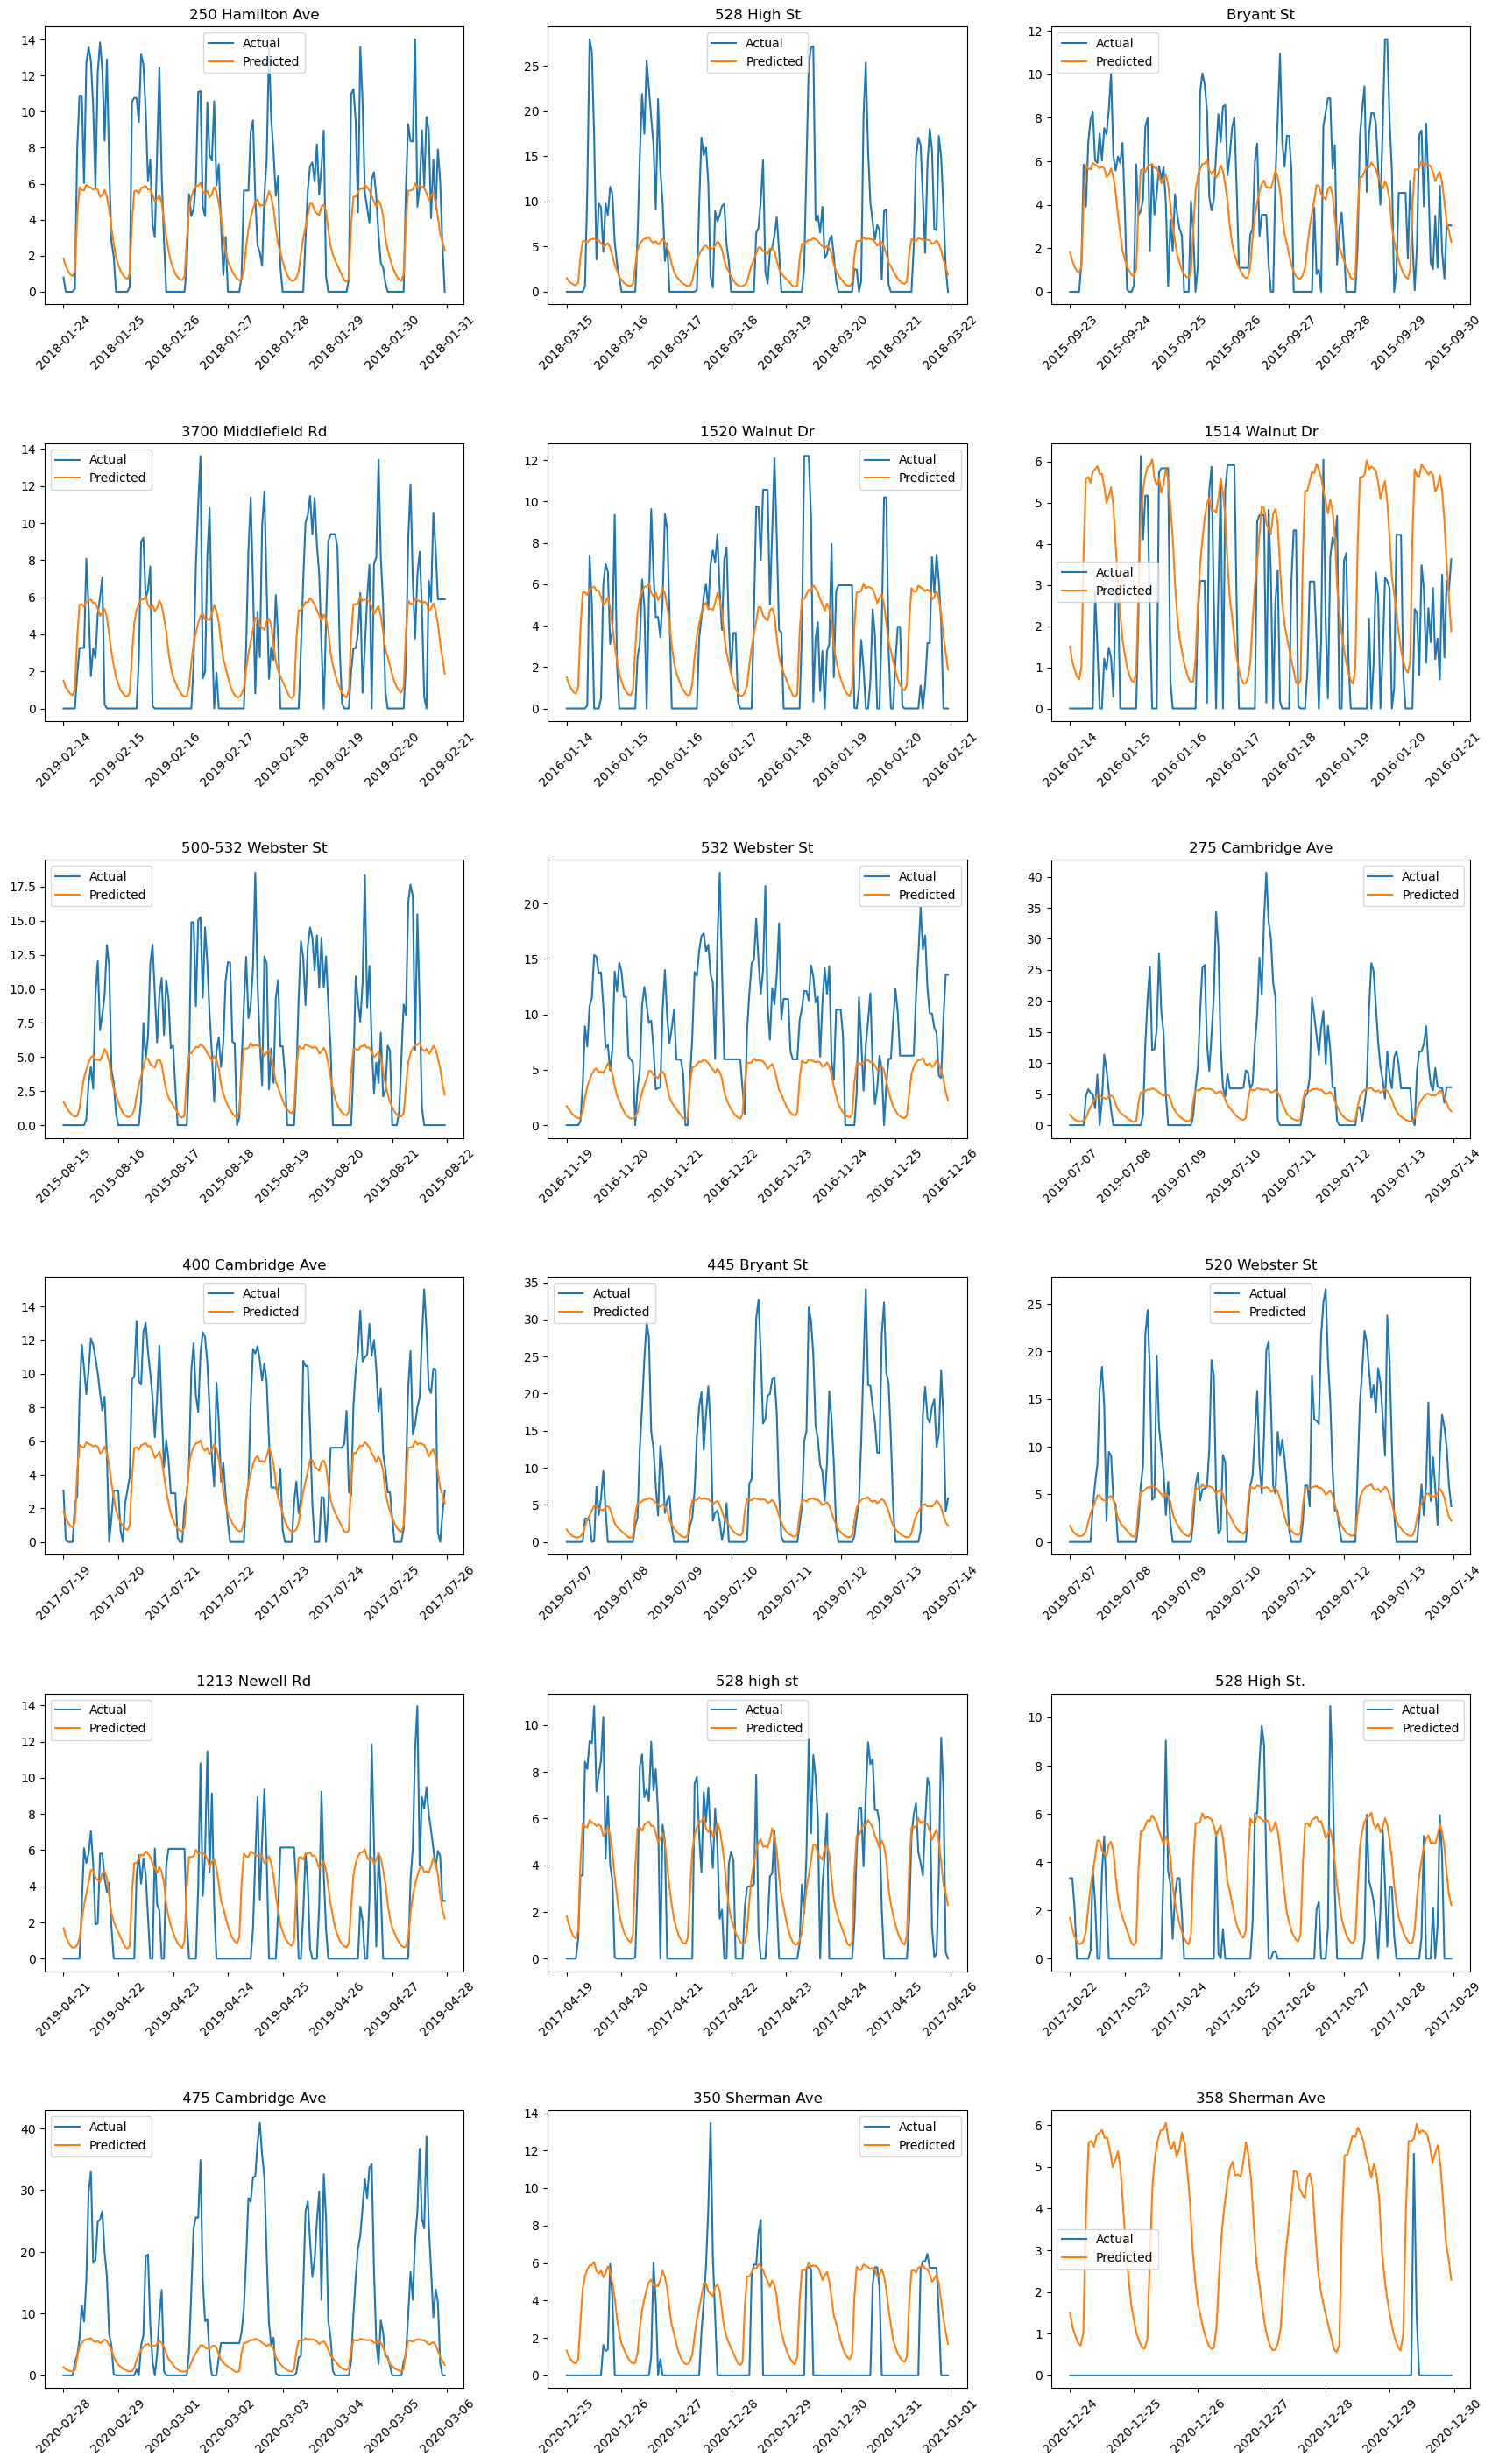

In [19]:
plot_all_predicted_vs_actual(test_data.values(), baseline_predictions, list(training_data.keys()))

For our prediction model, we decided to use XGBoost, since it has shown to perform well on time series forecasting. The idea is to use a number of data points from previous hours along with additional features such as "hour", "day_of_week", "is_weekend" and "month" to help the model make predictions. When training, the model uses true past values, and when testing, it uses the past predictions. Then, at the end of the day, the predictions are replaced with true values before making predictions for the next day.

## XGB model

In [20]:
from xgboost import XGBRegressor

# Function to create lag features
lags = [1, 2, 3, 24, 48, 72, 96]
limit_in_days = None
def create_features(df: pd.DataFrame, y_variable: str) -> pd.DataFrame:
    if type(df.index) != pd.DatetimeIndex:
        raise ValueError("Index of the DataFrame must be a DatetimeIndex") 
    for lag in lags:
        df[f"lag_{lag}"] = df[y_variable].shift(lag)
    df["hour"] = df.index.hour
    df["dayofweek"] = df.index.dayofweek
    df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)
    df["month"] = df.index.month
    return df

def train_model(hourly_df: pd.DataFrame, y_variable: str) -> XGBRegressor:
    features_df = create_features(pd.DataFrame(hourly_df, columns=[y_variable]), y_variable)
    features_df = features_df.dropna().reset_index(drop=True)

    # Splitting into features and target
    X_train = features_df.drop(columns=[y_variable])
    y_train = features_df[y_variable]

    model = XGBRegressor(n_estimators=100, learning_rate=0.16, max_depth=7, random_state=42)
    model.fit(X_train, y_train)
    return model

def test_model(model: XGBRegressor, targets: pd.Series, last_known_data: pd.Series) -> pd.Series:
    predictions = pd.Series()  # Store all predictions
    i = 0
    for dt in targets.index:
        new_row = {f"lag_{lag}": last_known_data.iloc[-lag] for lag in lags}
        new_row["hour"] = dt.hour
        new_row["dayofweek"] = dt.dayofweek
        new_row["is_weekend"] = int(dt.dayofweek in [5, 6])
        new_row["month"] = dt.month
        prediction = model.predict(pd.DataFrame(new_row, index=[0]))
        predictions[dt] = prediction[0]
        last_known_data = pd.concat([last_known_data.iloc[1:], pd.Series(prediction[0], index=[dt])])

        if dt.hour == 23:
            i+=1
            last_known_data = pd.concat([last_known_data.iloc[:-24], pd.Series(targets[targets.index.normalize() == dt.normalize()])])  # type: ignore
            if limit_in_days is not None and i == limit_in_days:
                break

    return predictions

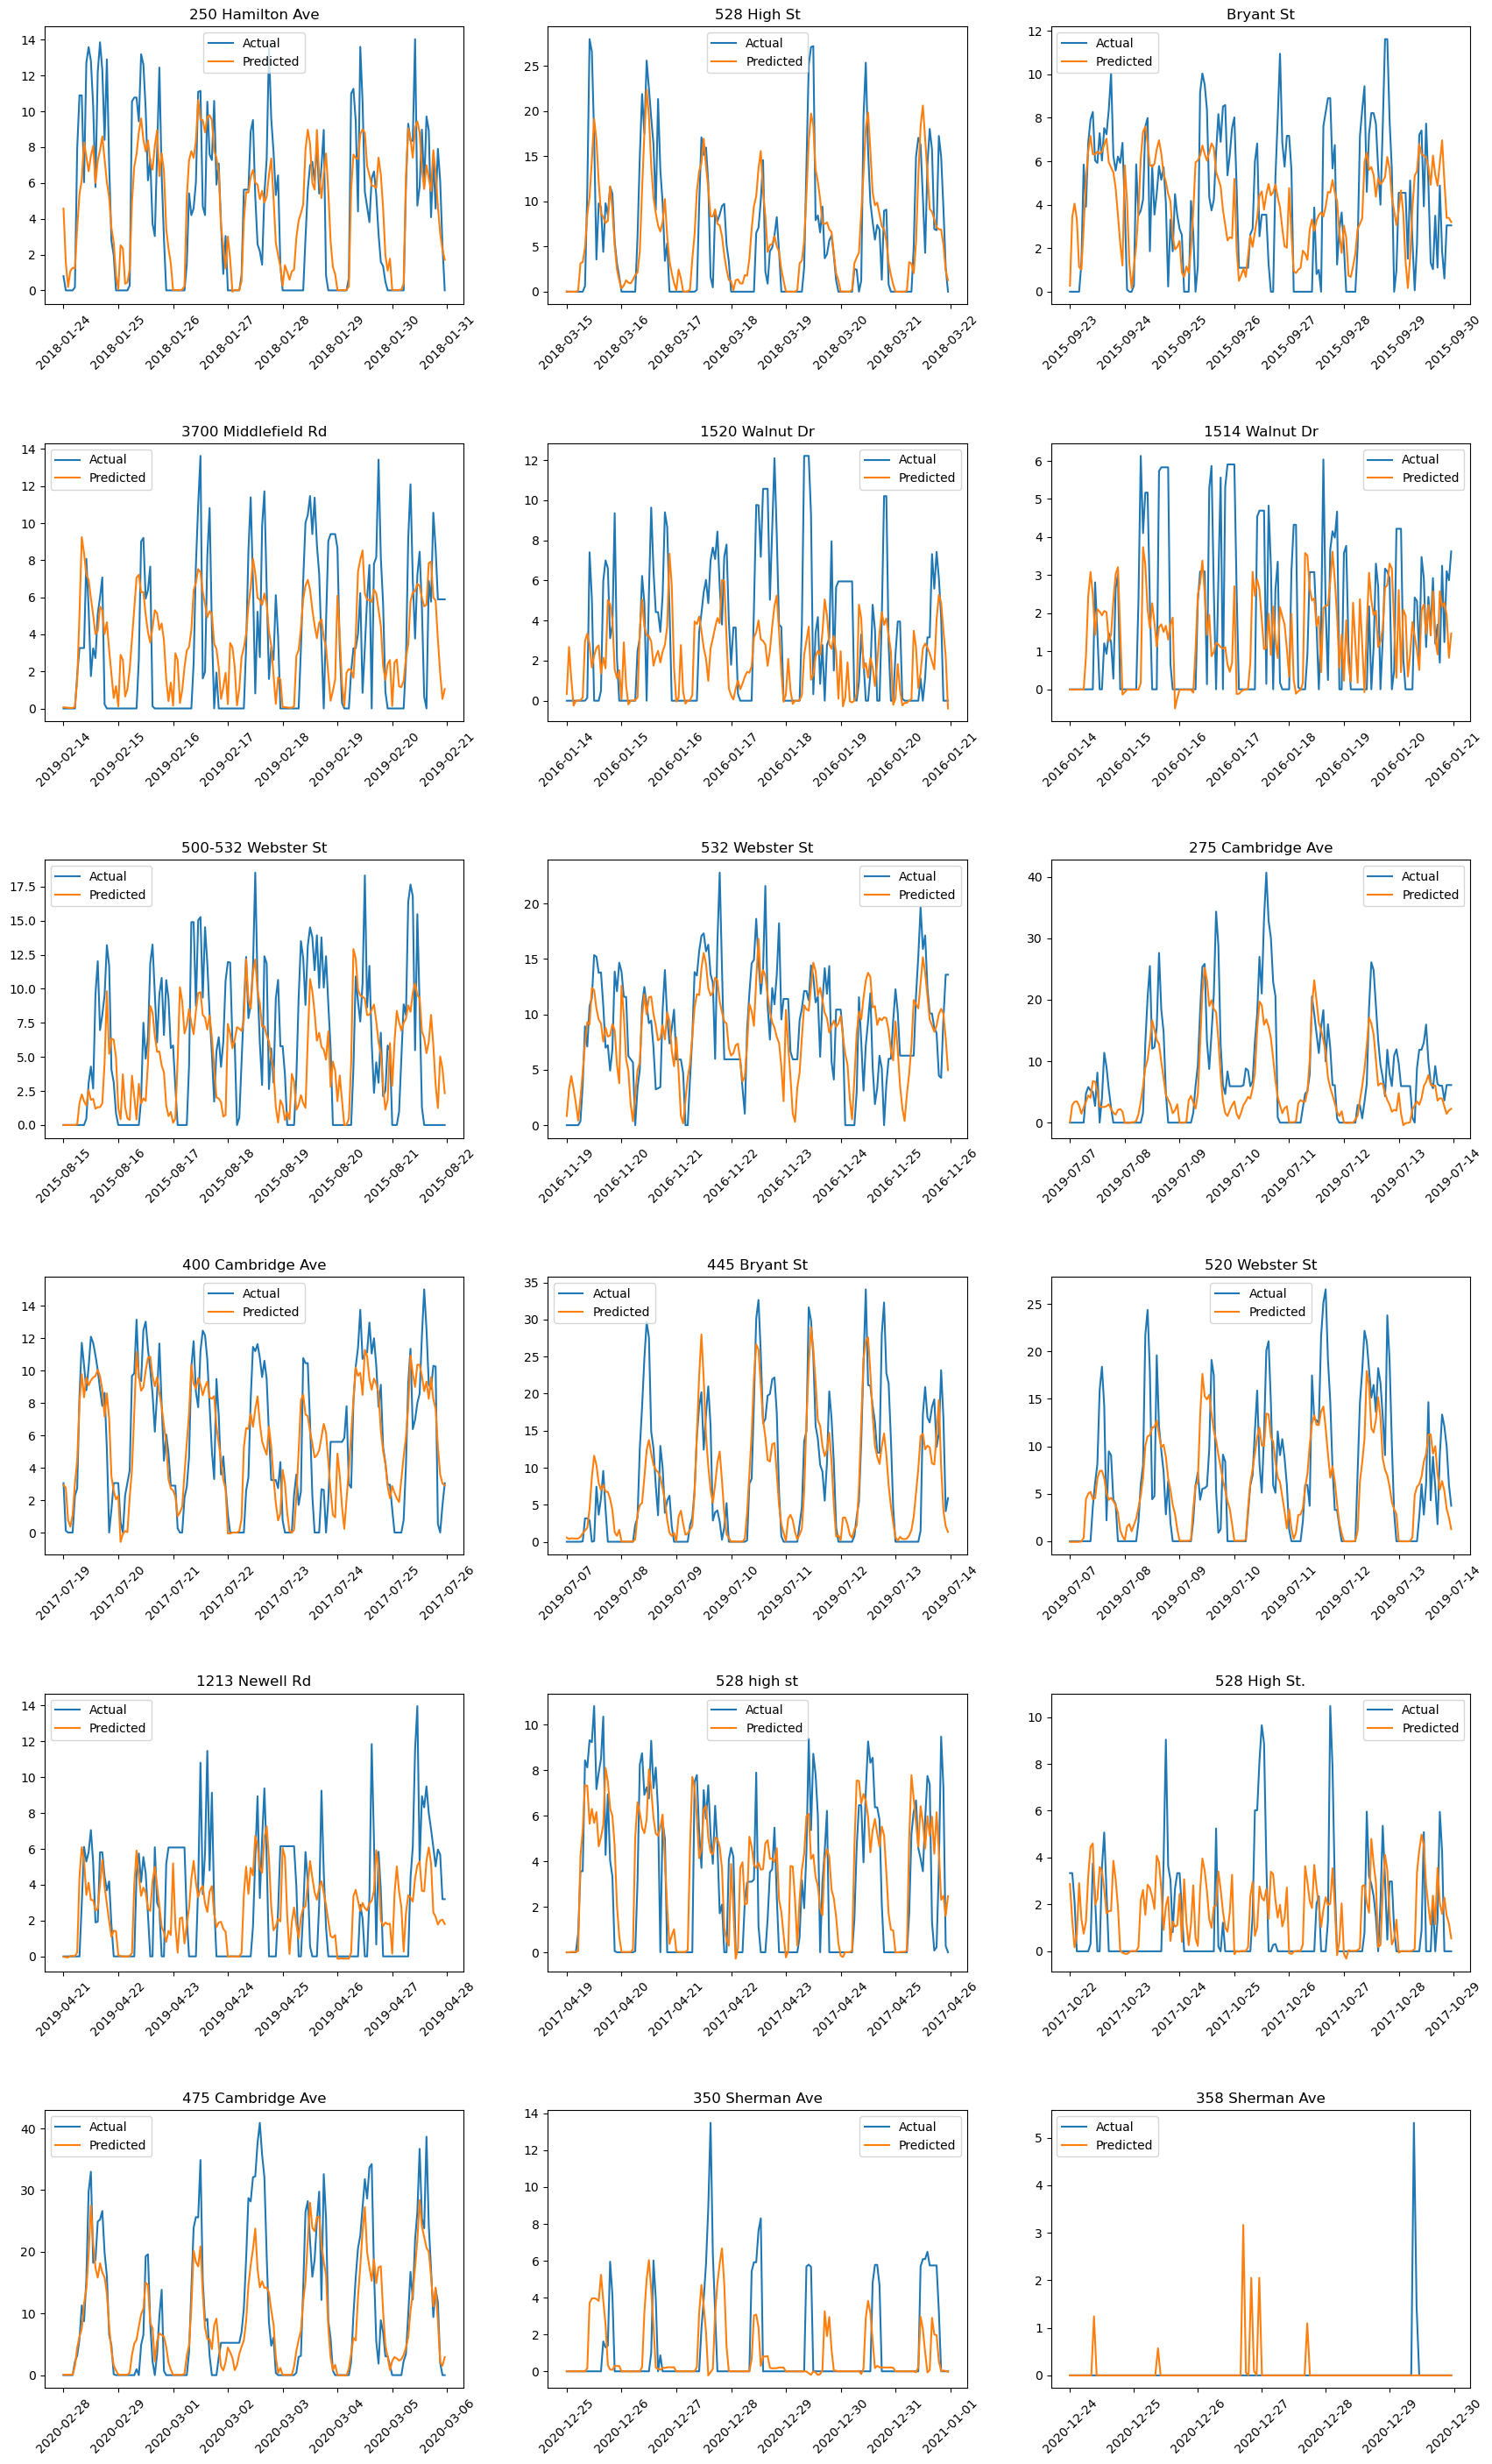

In [21]:
models = dict()
xgb_predictions = []
for station_name, hourly_df in training_data.items():
    model = train_model(hourly_df, "Consumption")
    if model is not None:
        models[station_name] = model
    else:
        print(f"Skipping {station_name} due to insufficient data")
        continue

    targets = test_data[station_name]
    if limit_in_days is not None:
        targets = targets.iloc[:limit_in_days * 24]
    last_known_data = hourly_df.iloc[-max(lags):]
    xgb_prediction = test_model(model, targets, last_known_data)
    stats.loc[station_name]["r^2 XGBoost"] = r2_score(targets, xgb_prediction)
    stats.loc[station_name]["MAE XGBoost"] = mean_absolute_error(targets, xgb_prediction)
    xgb_predictions.append(xgb_prediction)
plot_all_predicted_vs_actual(test_data.values(), xgb_predictions, list(training_data.keys()))

## Comparison

We can already see from the graph that this model does a better job of predicting than the baseline model. To see it more precisely, we look at r^2 and MAE metrics.

In [22]:
stats["r^2 Baseline"] = stats["r^2 Baseline"].apply(lambda x: x if -2 < x < 2 else None)
print(stats.mean())

r^2 Baseline    -0.01449
MAE Baseline     3.30232
r^2 XGBoost     0.208011
MAE XGBoost     2.546383
dtype: object


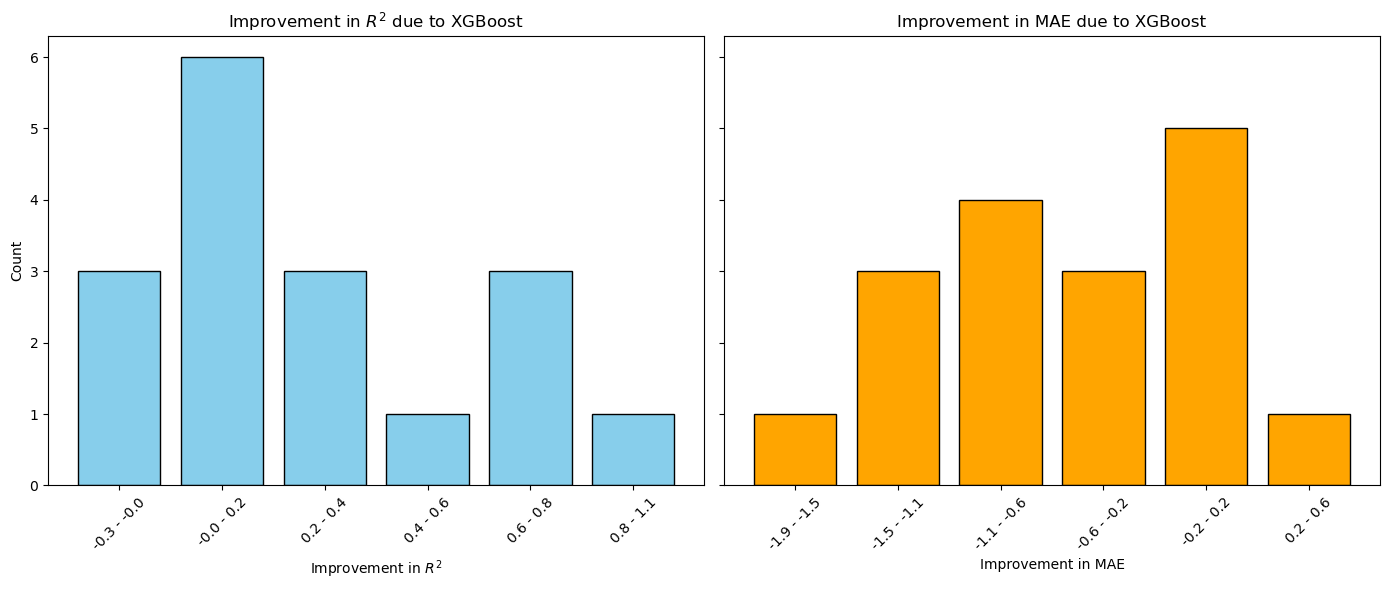

In [ ]:
bins = 6
stats.dropna(inplace=True)

# Compute histograms for R^2
r2_counts, r2_bin_edges = np.histogram(stats["r^2 XGBoost"] - stats["r^2 Baseline"], bins=bins)
r2_bin_labels = [f"{r2_bin_edges[i]:.1f} - {r2_bin_edges[i+1]:.1f}" for i in range(len(r2_bin_edges) - 1)]

# Compute histograms for MAE
mae_counts, mae_bin_edges = np.histogram(stats["MAE XGBoost"] - stats["MAE Baseline"], bins=bins)
mae_bin_labels = [f"{mae_bin_edges[i]:.1f} - {mae_bin_edges[i+1]:.1f}" for i in range(len(mae_bin_edges) - 1)]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# R^2 plot
axes[0].bar(range(len(r2_counts)), r2_counts, color="skyblue", edgecolor="black")
axes[0].set_xticks(range(len(r2_counts)))
axes[0].set_xticklabels(r2_bin_labels, rotation=45)
axes[0].set_title("Improvement in $R^2$ due to XGBoost compared to baseline")
axes[0].set_xlabel("Improvement in $R^2$")
axes[0].set_ylabel("Count")

# MAE plot
axes[1].bar(range(len(mae_counts)), mae_counts, color="orange", edgecolor="black")
axes[1].set_xticks(range(len(mae_counts)))
axes[1].set_xticklabels(mae_bin_labels, rotation=45)
axes[1].set_title("Improvement in MAE due to XGBoost compared to baseline")
axes[1].set_xlabel("Improvement in MAE")

# Adjust layout
plt.tight_layout()
plt.show()



The graphes show how the metrics change by using XGBoost model instead of the baseline one. We can see the change in R^2 is significantly positive and in MAE significantly negative, what is what we wanted. Both show that the XGBoost model has a better predictive power compared to the baseline model.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
path_dataset = "../data/EVChargingStationUsage.csv"
data = pd.read_csv(path_dataset)

C:\Users\Mathias Dyhr\AppData\Local\Temp\ipykernel_11316\950735941.py:2: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path_dataset)


#### Exploratory Component:
What variables effect the probability that EV customers would hoard charging stations(i.e. charging the car longer than necessary)?

## Introduction

The efficiency of EV charging stations still have challenges. One of these challenges are hoarding behaviour, where users occupy the charging stations longer than necessary. This can lead to less useable charging stations and can negatively influence customer satisfaction and station utilization. With this analysis, we aim to look at the factors affecting the likelihood of hoarding behaviours among EV users. 

## Pre-Processing
First we need to find relevant data that can be used to answer the research question. Then it needs to be cleaned and structured so it is ready for analysis. 
- Most important is the duration of the charge to spot out the hoarders. (Start Date - End Date).
- Then we clean the data - create a column that indates weekday or weekend.
- Reduce data to only relevant features

In [ ]:
# Convert time to datetime format
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['End Date'] = pd.to_datetime(data['End Date'], errors='coerce')
# Invalid dates becomes NaT


# Remove the NaT time data 
data = data.dropna(subset=['Start Date', 'End Date'])

# Switch time format to hours
def duration_to_hours(duration_str):
    try:
        h, m, s = map(int, duration_str.split(':'))
        return h + m / 60 + s / 3600
    except ValueError:
        return None
data['Charging Duration (hrs)'] = data['Charging Time (hh:mm:ss)'].apply(duration_to_hours)

# Create a new column that indicates weekend
data['Day of Week'] = data['Start Date'].dt.dayofweek  # 0=Monday, 6=Sunday
data['Is Weekend'] = data['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)  # 1=Weekend, 0=Weekday

# Only use relevant data points
relevant_columns = [
    'Station Name', 'City', 'Fee', 'Charging Duration (hrs)', 
    'Energy (kWh)', 'GHG Savings (kg)', 'Plug Type', 
    'Is Weekend', 'Latitude', 'Longitude', 'User ID'
]
used_data = data[relevant_columns]

## Pre-Visualization 

To identify the hoarding problem, we start by getting some visuals.

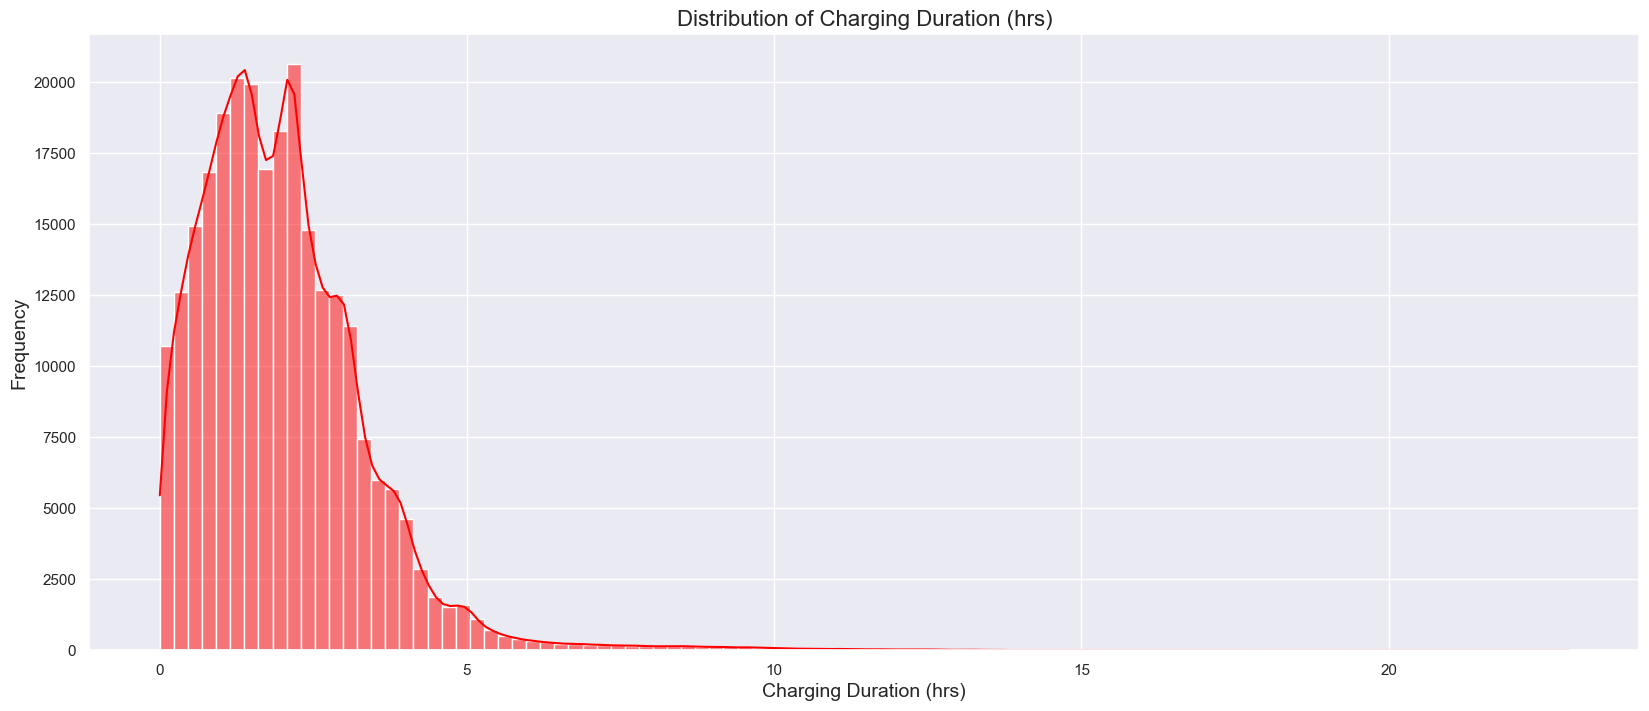

In [4]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 8))
sns.histplot(used_data['Charging Duration (hrs)'], bins=100, kde=True, color='red')
plt.title('Distribution of Charging Duration (hrs)', fontsize=16)
plt.xlabel('Charging Duration (hrs)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

It is seen that the EV charging stations are used at most between 0-3 hours. There is also a few people using it all the way to 5 hours.
Now we see the difference of energy consumptions for weekdays vs weekends.

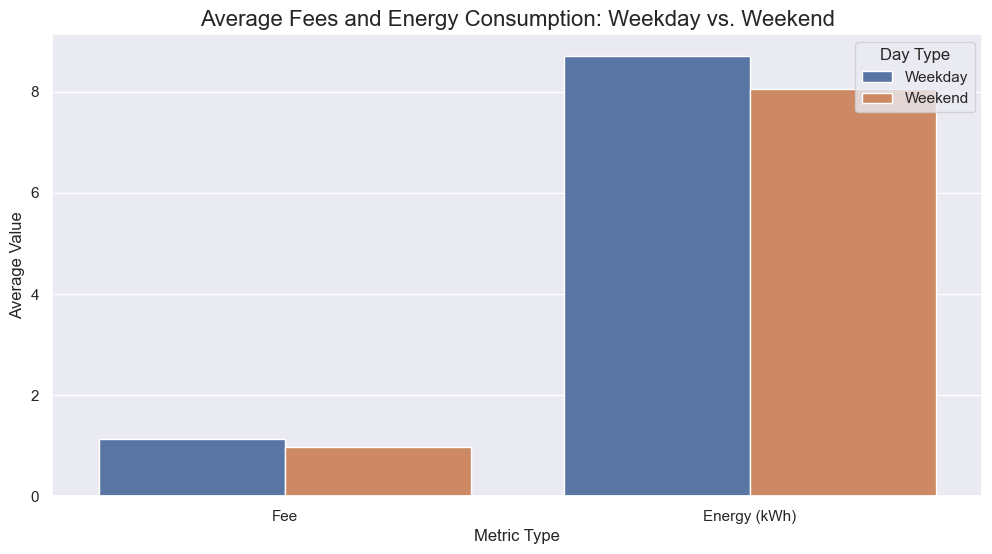

In [6]:
plt.figure(figsize=(12, 6))
weekend = used_data.groupby('Is Weekend')[['Fee', 'Energy (kWh)']].mean().reset_index()
weekend['Is Weekend'] = weekend['Is Weekend'].map({0: 'Weekday', 1: 'Weekend'})
weekend = weekend.melt(id_vars=['Is Weekend'], value_vars=['Fee', 'Energy (kWh)'], 
                               var_name='Metric', value_name='Average Value')
sns.barplot(data=weekend, x='Metric', y='Average Value', hue='Is Weekend', palette='deep')
plt.title('Average Fees and Energy Consumption: Weekday vs. Weekend', fontsize=16)
plt.xlabel('Metric Type', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(title='Day Type', loc='upper right')
plt.show()

This plot shows us that the fee during weekday is higher but there are still more users charging during weekdays(This can be due to work and mandatory duties that are mostly carried out during weekdays). Nothing significant can be concluded from the plot.
To top it off, we perform a correlation matrix to see which selected features correlates best with each other.

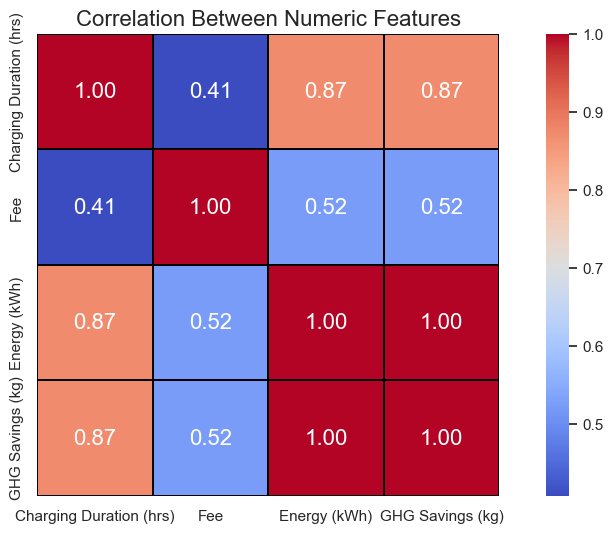

In [9]:
plt.figure(figsize=(12, 6))
nc = ['Charging Duration (hrs)', 'Fee', 'Energy (kWh)', 'GHG Savings (kg)']
corrmatrix = used_data[nc].corr()
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm', fmt='.2f',annot_kws={"size": 16}, linewidths=0.2,linecolor='black', square=True)
plt.title('Correlation Between Numeric Features', fontsize=16)
plt.show()

It can be seen that the correlation is positively correlated between all features, some more than others.

## Clustering   
To get more insight into the users behaviours, we perform clustering and group users on their charging behaviours.
### Goal:
The goal is to segment users into groups of either short-duration or long-duration charges - based on relevant features. 

We start performing elbow method on relevant data to determine number of clusters.

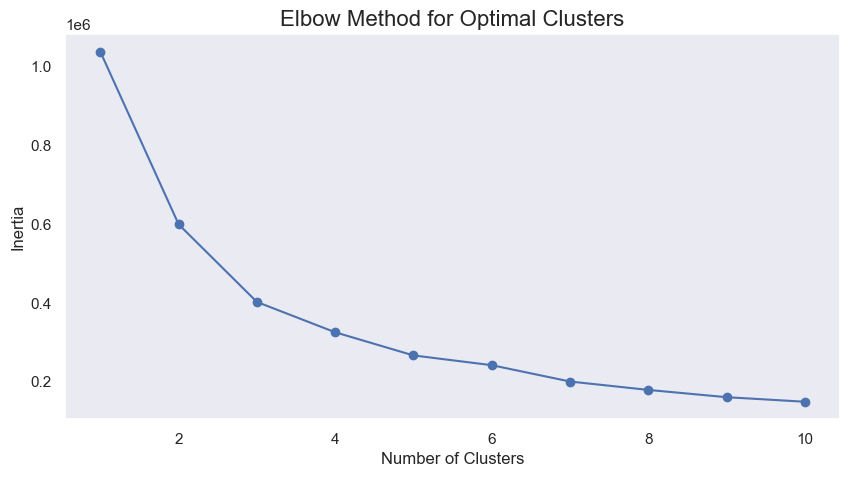

In [10]:
# Take relevant data
cluster_data = used_data[['Charging Duration (hrs)', 'Fee', 'Energy (kWh)', 'GHG Savings (kg)']].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

inertia = []
range_n_clusters = range(1, 11)
for k in range_n_clusters: #Elbow method
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid()
plt.show()

The elbow curve starts becoming less steep during k=3 

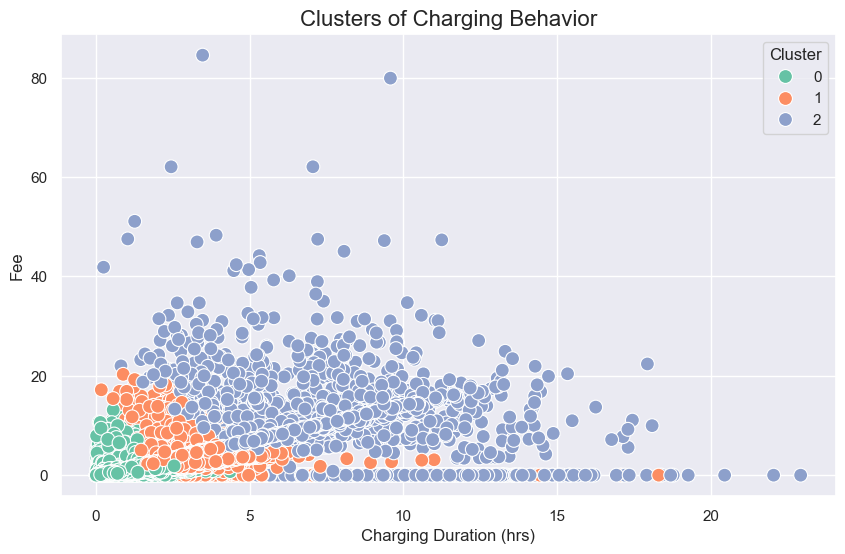

In [11]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cluster_data,
    x='Charging Duration (hrs)',
    y='Fee',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title('Clusters of Charging Behavior', fontsize=16)
plt.xlabel('Charging Duration (hrs)', fontsize=12)
plt.ylabel('Fee', fontsize=12)
plt.legend(title='Cluster')
plt.show()

In [10]:
cluster_summary = cluster_data.groupby('Cluster').agg({
    'Charging Duration (hrs)': 'mean',
    'Fee': 'mean',
    'Energy (kWh)': 'mean',
    'GHG Savings (kg)': 'mean'
}).reset_index()

print(cluster_summary)

   Cluster  Charging Duration (hrs)       Fee  Energy (kWh)  GHG Savings (kg)
0        0                 1.259438  0.546035      4.653914          1.954644
1        1                 3.010128  1.651855     13.535368          5.684855
2        2                 6.465808  7.054019     36.334559         15.260511


- Cluster 0(Green color) represents light users that charge briefly at low-cost stations with low energy consumption and GHG savings.
- Cluster 1(Orange color) represents moderate users who charge for a longer time, pays more and have higher GHG savings than cluster 0.
- Cluster 2(Blue color) represents heavy users who charge for long periods, pays a-lot more, consumes substantial energy and contribute the most to GHG savings.


To determine a hoarding threshold, we will look at the average duration of cluster 1 and cluster 2.

In [13]:
cluster_1_avg = 3.01 
cluster_2_avg = 6.47 
threshold = ((3.01 + 6.47 )/2)
print(threshold)

4.74


We conclude the threshold to be 4.74 hours - which means that everything above 4.74 hours becomes hoarding.

## Regression

Next step, we use a regression model to try and predict whether an EV user is likely to hoard a charging station.
- First we use the threshold 4.74 as our hoarding threshold
- Then determine predictor variables as features, and include the categorical feature(Plug Type) & encode into the features
- Next we split train/test and use RandomForestClassifier to predict
- Use of evaluation methods
- Visualize importance of features

C:\Users\Mathias Dyhr\AppData\Local\Temp\ipykernel_11316\1234857883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['Hoarding'] = (used_data['Charging Duration (hrs)'] > threshold).astype(int)
C:\Users\Mathias Dyhr\AppData\Local\Temp\ipykernel_11316\1234857883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data[cat_col] = label_encoder.fit_transform(used_data[cat_col])


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75307
           1       1.00      1.00      1.00      2506

    accuracy                           1.00     77813
   macro avg       1.00      1.00      1.00     77813
weighted avg       1.00      1.00      1.00     77813

Confusion Matrix:
[[75307     0]
 [    0  2506]]
Feature Importance:
Charging Duration (hrs)    0.502838
Energy (kWh)               0.221871
GHG Savings (kg)           0.209693
Fee                        0.055532
Latitude                   0.003922
Longitude                  0.003331
Plug Type                  0.002321
Is Weekend                 0.000493
dtype: float64


C:\Users\Mathias Dyhr\AppData\Local\Temp\ipykernel_11316\1234857883.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')


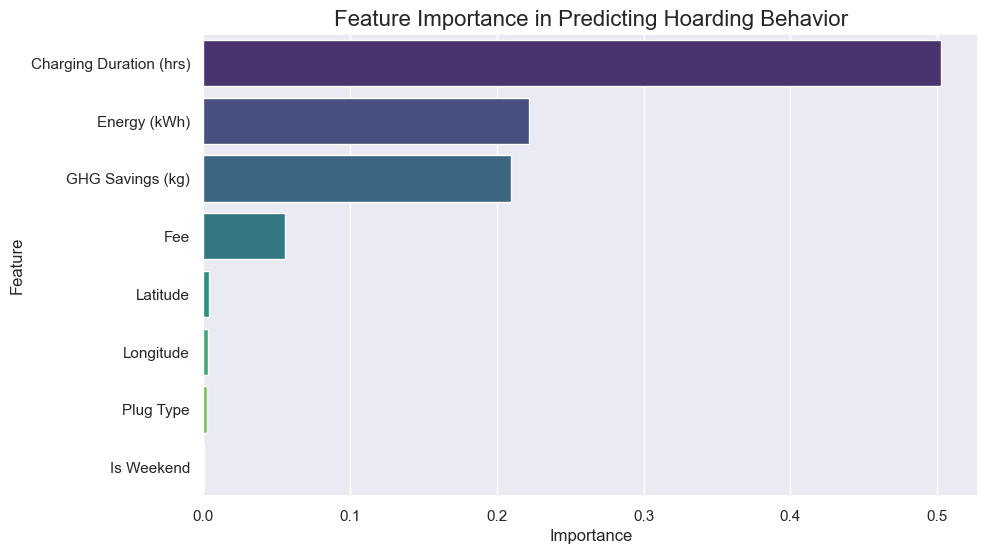

In [14]:
used_data['Hoarding'] = (used_data['Charging Duration (hrs)'] > threshold).astype(int)


features = ['Fee', 'Energy (kWh)', 'GHG Savings (kg)', 'Is Weekend', 'Latitude', 'Longitude','Charging Duration (hrs)']
categorical_features = ['Plug Type'] 
label_encoder = LabelEncoder()
for cat_col in categorical_features:
    used_data[cat_col] = label_encoder.fit_transform(used_data[cat_col])
    features.append(cat_col)

X = used_data[features]
y = used_data['Hoarding']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance in Predicting Hoarding Behavior', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

With a 99% accuracy rate, the regression model performed admirably overall. However, because there is a large class gap—far more non-hoarders than hoarders—this high accuracy might be deceptive. The model is quite successful at properly detecting and categorizing non-hoarders (Class 0), as seen by the accuracy and recall of 0.99 for this group. With a precision of 0.82 and a recall of 0.73 for hoarders (Class 1), the model is less successful in detecting hoarders, missing 27% of instances.

With 75,307 non-hoarders and just 2,506 hoarders, the data distribution clearly shows a class imbalance. The macro-average metrics of precision (0.90), recall (0.86), and F1 score (0.88) are more indicative of overall performance across both classes as a result of this bias in the accuracy metric.

According to confusion matrix analysis, the model performs exceptionally well at accurately identifying non-hoarders (74,899 true negatives), while it has a harder time predicting hoarders (673 false negatives). Although the model works well for non-hoarders, there is room for improvement in terms of how well it can detect hoarders. (Decided not to go deeper into it since - it's not the research question)

By using the regression model predictions, we can apply targeted interventions like dynamic pricing. We can do this by adjusting fee for hoarding by any factor. In this case lets try and increase it by 1.2.

In [ ]:
used_data['Adjusted Fee'] = used_data['Fee']
hoarding_mask = used_data['Hoarding'] == 1
used_data.loc[hoarding_mask, 'Adjusted Fee'] *= 1.2  #increase fee

C:\Users\Mathias Dyhr\AppData\Local\Temp\ipykernel_11316\3089315814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['Adjusted Fee'] = used_data['Fee']


With this, we can look over the entire timeline of the dataset, and see the difference in revenue that EV charging stations could have made, with the adjustment of fee for hoarders.

In [17]:
original_revenue = used_data['Fee'].sum()
adjusted_revenue = used_data['Adjusted Fee'].sum()
revenue_difference = adjusted_revenue - original_revenue

print(f"Original Revenue: ${original_revenue:.2f}")
print(f"Adjusted Revenue: ${adjusted_revenue:.2f}")
print(f"Revenue Difference: ${revenue_difference:.2f}")

Original Revenue: $284669.84
Adjusted Revenue: $292381.54
Revenue Difference: $7711.70


This means that a total of $7711.70 could have been made with this change.

WRITE THIS IN CONCLUSION:
-Discourage excessive charging durations.
-Increase revenue from those who do hoard.


## Conclusion

# Section 2a

### Business Recommendation

The clustering analysis identified three clear user groups: exclusive weekend users, exclusive weekday users, and no preference users. Each group has distinct usage patterns that can guide targeted strategies.

Understanding these groups helps businesses create targeted campaigns, improve user experiences, and optimize operations to meet each group's needs.

### Other notes

There were several attempts at clustering different features together with limited success. At that point we looked more into data transformation. 

The biggest improvement in clustering was log normalizing the difference between total weekend and total weekday charging station occupation.

Testing DBSCAN with several epsion values to determine the best silhouette score resulted in exactly the same clustering as k-means and therefore not included in the report.

# Section 2b

In section 2b, we have analysed energy consumption patterns for each charging station in order to predict energy consumption for each station. This information can have great business value for energy companies, because it can help them maintain grid stability. We started our analyses by observing how the consumption changes by hour of the day, day of the week and month of the year. We have visualized trends, proved stationarity and built two models for predicting hourly consumption, a naive baseline model and a more complex XGBoost model. The latter has achieved achieved significantly better results on the test set in both R^2 and MAE metrics compared to the baseline model, despite having to predict all 24 hours in advance. Two ways the model could still be improved would be to include weather data, which could have an impact on energy consumption, and reducing the batch size for forecasting, meaning to forecasting only 6 or 12 hours in advance instead of 24.

# Section 3 

##### Clustering

From clustering we have learned that it is possible to split users into categories on how much they occupy charging stations. This opens up for targeted tactics that can be used to improve customer happiness and charging station operations. Through discounts and promotions, consumers in Cluster 0 might be given motivation to move charging to off-peak hours or to promote more frequent charging.  Adding value through loyalty programs or premium services can improve the experience and retention of Cluster 2.

##### Regression

The regression model itself is bias and therefore require more improvement for it to become useful for a business tool to identify hoarders. 

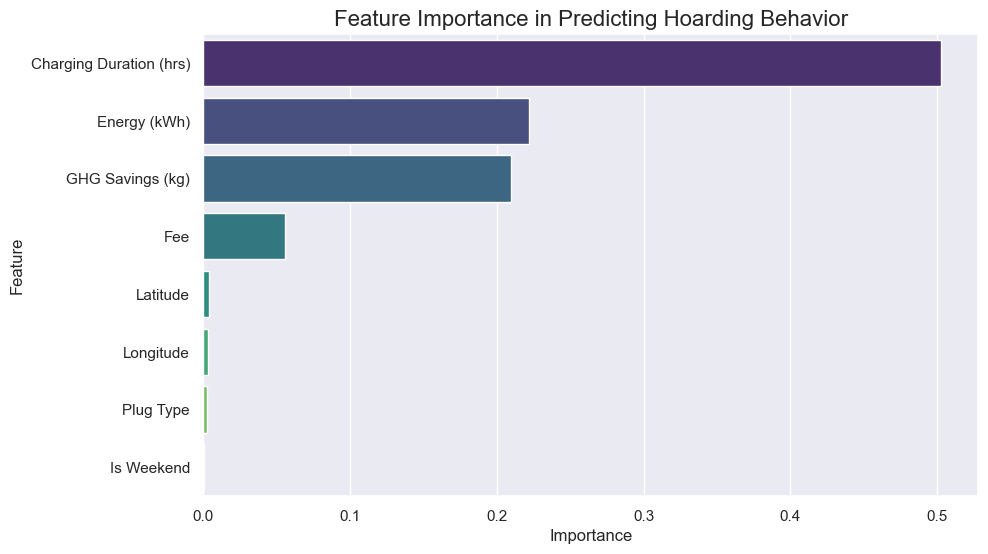

The regression model feature importance analysis, offers insightful information that can be used to improve business plans. Because "Charging Duration (hrs)" has such a big influence, rules and incentives should be centered on optimizing charging behavior. For example, time-based pricing or fines for prolonged charging durations should be implemented to detect hoarding. Customers with higher energy consumption or environmental impact can be targeted with customized value propositions(such as dynamic pricing), such as loyalty programs or extra bonuses for efficient charging, according to the relevance of "Energy (kWh)" and "GHG Savings (kg)".

Variables like "Fee," "Latitude,","Longitude" and "Is Weekend" have little bearing on hoarding behavior, which implies that changes in price or geographic conditions may have no direct effect. Alternatively, funds might be used to upgrade the infrastructure for charging and create regulations that focus on consumption trends and environmental impacts.

## Contributions

    Section 1:  Data Analysis      Philip Tarstrup s214418

    Section 2a: Clustering         Radu Grecu      s246415

    Section 2b: Regression         Vilim Branica   s243169

    Section 3:  Exploration        Mathias Dyhr    s204156

    Section 4:  Conclusion         25% from everyone